# Introduction to Smoke Detection

## Context

A smoke detector is a device that senses smoke, typically as an indicator of fire. Smoke detectors are usually housed in plastic enclosures, typically shaped like a disk about 150 millimetres (6 in) in diameter and 25 millimetres (1 in) thick, but shape and size vary.

## Types of Smoke Detectors
##### Photoelectric Smoke Detector
A photoelectric smoke detector contains a source of infrared, visible, or ultraviolet light, a lens, and a photoelectric receiver. In some types, the light emitted by the light source passes through the air being tested and reaches the photosensor. The received light intensity will be reduced due to scattering from particles of smoke, air-borne dust, or other substances; the circuitry detects the light intensity and generates an alarm if it is below a specified threshold, potentially due to smoke. Such detectors are also known as optical detectors.

##### Ionization Smoke Detector
An ionization smoke detector uses a radioisotope to ionize air. If any smoke particles enter the open chamber, some of the ions will attach to the particles and not be available to carry the current in that chamber. An electronic circuit detects that a current difference has developed between the open and sealed chambers, and sounds the alarm
The author of this dataset has successfully created a smoke detection device with the help of IOT devices and AI model.

## About the Dataset

Collection of training data is performed with the help of IOT devices since the goal is to develop a AI based smoke detector device. Many different environments and fire sources have to be sampled to ensure a good dataset for training. A short list of different scenarios which are captured:

- Normal indoor
- Normal outdoor
- Indoor wood fire, firefighter training area
- Indoor gas fire, firefighter training area
- Outdoor wood, coal, and gas grill
- Outdoor high humidity etc.
- The dataset is nearly 60.000 readings long. The sample rate is 1Hz for all sensors. To keep track of the data, a UTC timestamp is added to every sensor reading.

The dataset contains air properties gotten from the proposed sorrounding of the experiment.

## The dataset has 16 columns which are:

- UTC - The time when experiment was performed.
- Temperature - Temperature of Surroundings. Measured in Celsius
- Humidity - The air humidity during the experiment.
- TVOC - Total Volatile Organic Compounds. Measured in ppb (parts per billion)
- eCo2 - CO2 equivalent concentration. Measured in ppm (parts per million)
- Raw H2 - The amount of Raw Hydrogen present in the surroundings.
- Raw Ethanol - The amount of Raw Ethanol present in the surroundings.
- Pressure - Air pressure. Measured in hPa
- PM1.0 - Paticulate matter of diameter less than 1.0 micrometer .
- PM2.5 - Paticulate matter of diameter less than 2.5 micrometer.
- NC0.5 - Concentration of particulate matter of diameter less than 0.5 micrometers.
- NC1.0 - Concentration of particulate matter of diameter less than 1.0 micrometers.
- NC2.5 - Concentration of particulate matter of diameter less than 2.5 micrometers.
- CNT - Simple Count. Fire Alarm - (Reality) If fire was present then value is 1 else it is 0.

In [1]:
# Import all required modules
import numpy as np
import pandas as pd

# Import plotting modules and set up
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
from matplotlib import rcParams
rcParams["figure.figsize"] = 8, 5
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Data Ingestion

In [2]:
DATA_PATH = "./data/smoke_detection_iot.csv"

In [3]:
df = pd.read_csv(DATA_PATH, index_col=0)

## Understanding and Exploring the Dataset

In [4]:
df.sample(10)

UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  Raw H2  \
48099  1654784448          26.290        51.09       1302        400   12981   
20370  1654753701          12.474        47.28       1249        400   12954   
55380  1654716425          43.140        32.15      12403        531   12748   
8923   1654742254          -5.193        57.20        362        400   13064   
44412  1654780761          24.930        51.77       1218        407   12926   
31723  1654768072          21.010        51.07        206        400   13151   
55492  1654716537          46.210        28.73      11727        400   12820   
28096  1654764445          19.070        49.42        178        400   13151   
46417  1654782766          26.100        52.34       1260        400   12964   
23738  1654757069         -18.317        52.06       1419        415   12972   

       Raw Ethanol  Pressure[hPa]  PM1.0  PM2.5  NC0.5  NC1.0  NC2.5    CNT  \
48099        19412        938.724   1.94   2.02  13.37  2.085  0.047  23105   
20370        19420        938.759   2.12   2.20  14.56  2.270  0.051  20370   
55380        19174        936.874   0.36   0.38   2.50  0.390  0.009   4238   
8923         19908        939.264   0.51   0.53   3.49  0.544  0.012   8923   
44412        19433        938.671   1.92   1.99  13.21  2.060  0.047  19418   
31723        20057        939.592   0.62   0.64   4.24  0.660  0.015   6729   
55492        19217        936.873   0.57   0.59   3.93  0.613  0.014   4350   
28096        20000        939.646   0.72   0.75   4.94  0.771  0.017   3102   
46417        19406        938.695   1.77   1.83  12.15  1.895  0.043  21423   
23738        19378        938.728   1.81   1.88  12.48  1.947  0.044  23738   

       Fire Alarm  
48099           1  
20370           1  
55380           0  
8923            1  
44412           1  
31723           1  
55492           0  
28096           0  
46417           1  
23738           1

In [5]:
df.columns

Index(['UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5',
       'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')

In [6]:
df.shape

(62630, 15)

In [7]:
df.size

939450

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62630 non-null  float64
 2   Humidity[%]     62630 non-null  float64
 3   TVOC[ppb]       62630 non-null  int64  
 4   eCO2[ppm]       62630 non-null  int64  
 5   Raw H2          62630 non-null  int64  
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62630 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(7)
memory usage: 7.6 MB


In [9]:
df.describe().transpose()

count          mean            std           min  \
UTC             62630.0  1.654792e+09  110002.488078  1.654712e+09   
Temperature[C]  62630.0  1.597042e+01      14.359576 -2.201000e+01   
Humidity[%]     62630.0  4.853950e+01       8.865367  1.074000e+01   
TVOC[ppb]       62630.0  1.942058e+03    7811.589055  0.000000e+00   
eCO2[ppm]       62630.0  6.700210e+02    1905.885439  4.000000e+02   
Raw H2          62630.0  1.294245e+04     272.464305  1.066800e+04   
Raw Ethanol     62630.0  1.975426e+04     609.513156  1.531700e+04   
Pressure[hPa]   62630.0  9.386276e+02       1.331344  9.308520e+02   
PM1.0           62630.0  1.005943e+02     922.524245  0.000000e+00   
PM2.5           62630.0  1.844678e+02    1976.305615  0.000000e+00   
NC0.5           62630.0  4.914636e+02    4265.661251  0.000000e+00   
NC1.0           62630.0  2.035865e+02    2214.738556  0.000000e+00   
NC2.5           62630.0  8.004904e+01    1083.383189  0.000000e+00   
CNT             62630.0  1.051139e+04    7597.870997  0.000000e+00   
Fire Alarm      62630.0  7.146256e-01       0.451596  0.000000e+00   

                         25%           50%           75%           max  
UTC             1.654743e+09  1.654762e+09  1.654778e+09  1.655130e+09  
Temperature[C]  1.099425e+01  2.013000e+01  2.540950e+01  5.993000e+01  
Humidity[%]     4.753000e+01  5.015000e+01  5.324000e+01  7.520000e+01  
TVOC[ppb]       1.300000e+02  9.810000e+02  1.189000e+03  6.000000e+04  
eCO2[ppm]       4.000000e+02  4.000000e+02  4.380000e+02  6.000000e+04  
Raw H2          1.283000e+04  1.292400e+04  1.310900e+04  1.380300e+04  
Raw Ethanol     1.943500e+04  1.950100e+04  2.007800e+04  2.141000e+04  
Pressure[hPa]   9.387000e+02  9.388160e+02  9.394180e+02  9.398610e+02  
PM1.0           1.280000e+00  1.810000e+00  2.090000e+00  1.433369e+04  
PM2.5           1.340000e+00  1.880000e+00  2.180000e+00  4.543226e+04  
NC0.5           8.820000e+00  1.245000e+01  1.442000e+01  6.148203e+04  
NC1.0           1.384000e+00  1.943000e+00  2.249000e+00  5.191468e+04  
NC2.5           3.300000e-02  4.400000e-02  5.100000e-02  3.002644e+04  
CNT             3.625250e+03  9.336000e+03  1.716475e+04  2.499300e+04  
Fire Alarm      0.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00

In [10]:
df.isna().sum()

UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [11]:
df.nunique()

UTC               62630
Temperature[C]    21672
Humidity[%]        3890
TVOC[ppb]          1966
eCO2[ppm]          1713
Raw H2             1830
Raw Ethanol        2659
Pressure[hPa]      2213
PM1.0              1337
PM2.5              1351
NC0.5              3093
NC1.0              4113
NC2.5              1161
CNT               24994
Fire Alarm            2
dtype: int64

## Observations

* There are total of 62360 rows and 15 coloumns in data.
* Data contains no missing value.
* We do not have any categorical feature
* There are a total of 810680 (62360 x 13) observations .

In [12]:
temp_utc = pd.to_datetime(df['UTC'],unit='s')
temp_utc

0       2022-06-09 00:08:51
1       2022-06-09 00:08:52
2       2022-06-09 00:08:53
3       2022-06-09 00:08:54
4       2022-06-09 00:08:55
                ...        
62625   2022-06-13 14:20:47
62626   2022-06-13 14:20:48
62627   2022-06-13 14:20:49
62628   2022-06-13 14:20:50
62629   2022-06-13 14:20:51
Name: UTC, Length: 62630, dtype: datetime64[ns]

## Exploring the time of recorded dataset

In [13]:
temp_utc.dt.month.value_counts()

UTC
6    62630
Name: count, dtype: int64

In [14]:
temp_utc.dt.year.value_counts()

UTC
2022    62630
Name: count, dtype: int64

In [15]:
temp_utc.dt.day.value_counts()

UTC
9     49988
8      5744
13     5744
10     1154
Name: count, dtype: int64

In [16]:
day_part = pd.cut(temp_utc.dt.hour, bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])

In [17]:
day_part.value_counts()

UTC
Night        21600
Morning      19474
Afternoon    14202
Evening       4285
Name: count, dtype: int64

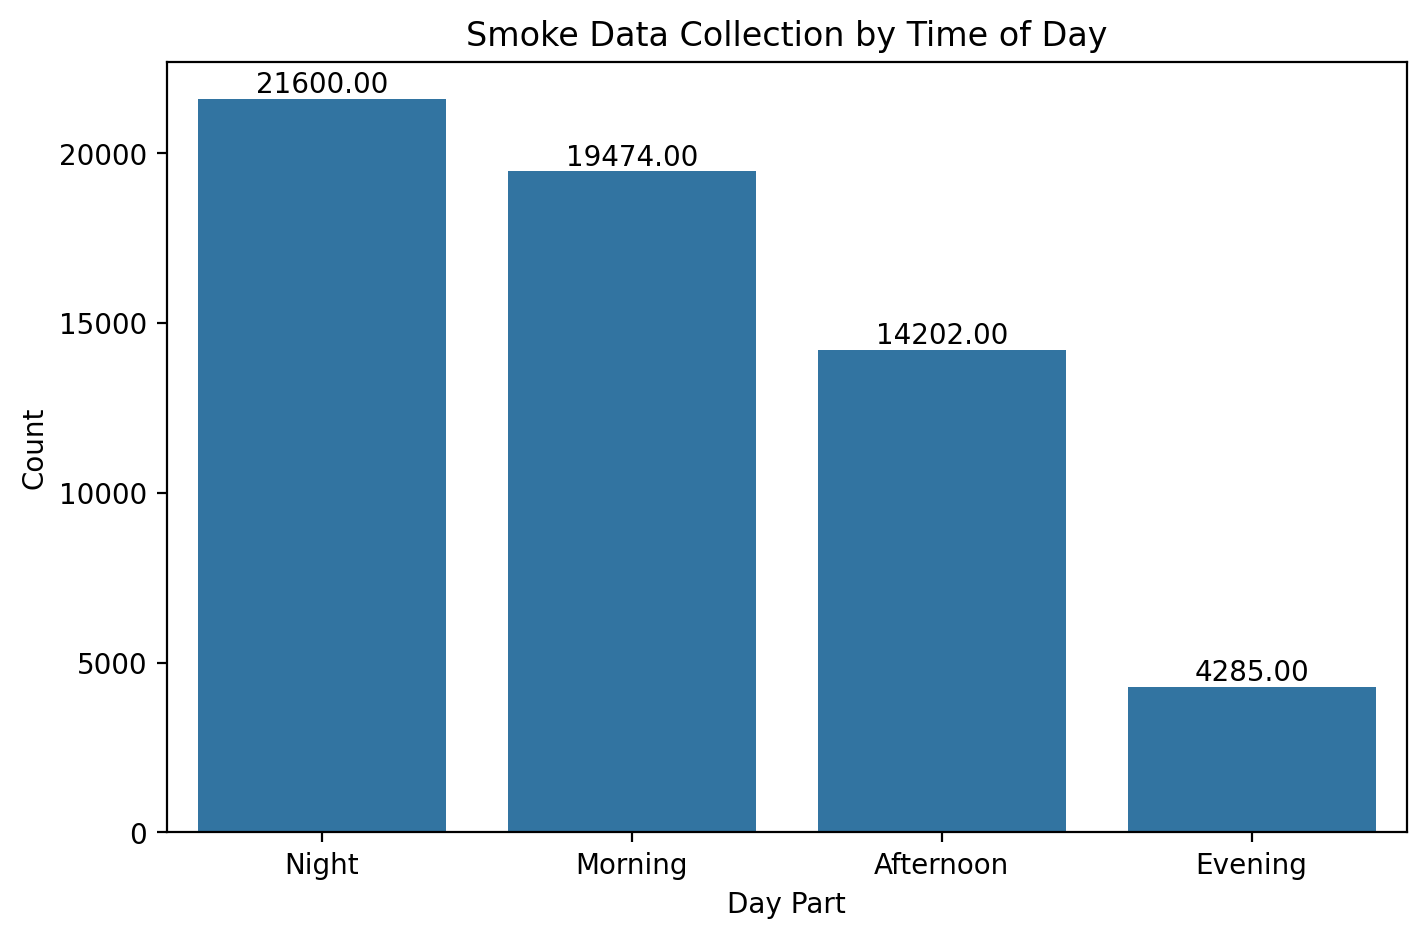

In [18]:
plt.figure(figsize=(8, 5))

# day_part.value_counts().plot(kind='bar')
ax = sns.barplot(data=day_part.value_counts())
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.xlabel('Day Part')
plt.ylabel('Count')
plt.title('Smoke Data Collection by Time of Day')
plt.show()


### Insights:

* Nighttime Dominance: The data indicates that the majority of the activity or events occurred during the night (UTC). This represents approximately 40% of the total occurrences.
* Morning Peak: The morning period (UTC) also saw a substantial number of events, constituting around 36% of the total.
* Afternoon and Evening: The afternoon and evening periods combined account for less than 34% of the total occurrences, suggesting a lower activity level during these times.

In [19]:
df.sample(5)

UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  Raw H2  \
59734  1655127156          19.477        44.86        163        422   12779   
47956  1654784305          24.660        52.94       1293        409   12971   
13679  1654747010          19.170        53.35       1113        513   12848   
6425   1654739756          -7.297        52.04        178        400   13168   
14059  1654747390          17.435        47.47       1105        485   12854   

       Raw Ethanol  Pressure[hPa]  PM1.0  PM2.5  NC0.5  NC1.0  NC2.5    CNT  \
59734        20554        937.406   1.66   1.73  11.44  1.784  0.040   2848   
47956        19402        938.715   2.00   2.08  13.76  2.146  0.048  22962   
13679        19455        938.870   2.21   2.30  15.24  2.376  0.054  13679   
6425         20085        939.610   0.84   0.87   5.79  0.903  0.020   6425   
14059        19460        938.907   1.78   1.85  12.26  1.912  0.043  14059   

       Fire Alarm  
59734           0  
47956           1  
13679           1  
6425            1  
14059           1

UTC and CNT can be deleted since they dont have any contribution in Firealarm.

In [20]:
# deleting unwanted columns
df = df.drop(columns=['UTC', 'CNT'])
df.sample(5)

Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  Raw H2  Raw Ethanol  \
43579          24.720        52.93       1207        410   12909        19426   
40421          26.600        49.38       1159        429   12876        19438   
48634          24.300        54.28       1373        412   12973        19386   
47275          26.900        47.97       1369        414   12960        19390   
21094           1.467        49.70       1461        438   12930        19362   

       Pressure[hPa]  PM1.0  PM2.5  NC0.5  NC1.0  NC2.5  Fire Alarm  
43579        938.738   1.80   1.87  12.37  1.929  0.044           1  
40421        938.825   1.62   1.68  11.14  1.737  0.039           1  
48634        938.711   1.79   1.86  12.30  1.919  0.043           1  
47275        938.721   1.82   1.89  12.52  1.952  0.044           1  
21094        938.692   1.61   1.68  11.11  1.733  0.039           1

## EDA

Text(0.5, 1.0, 'Numbers of Fire Alarm')

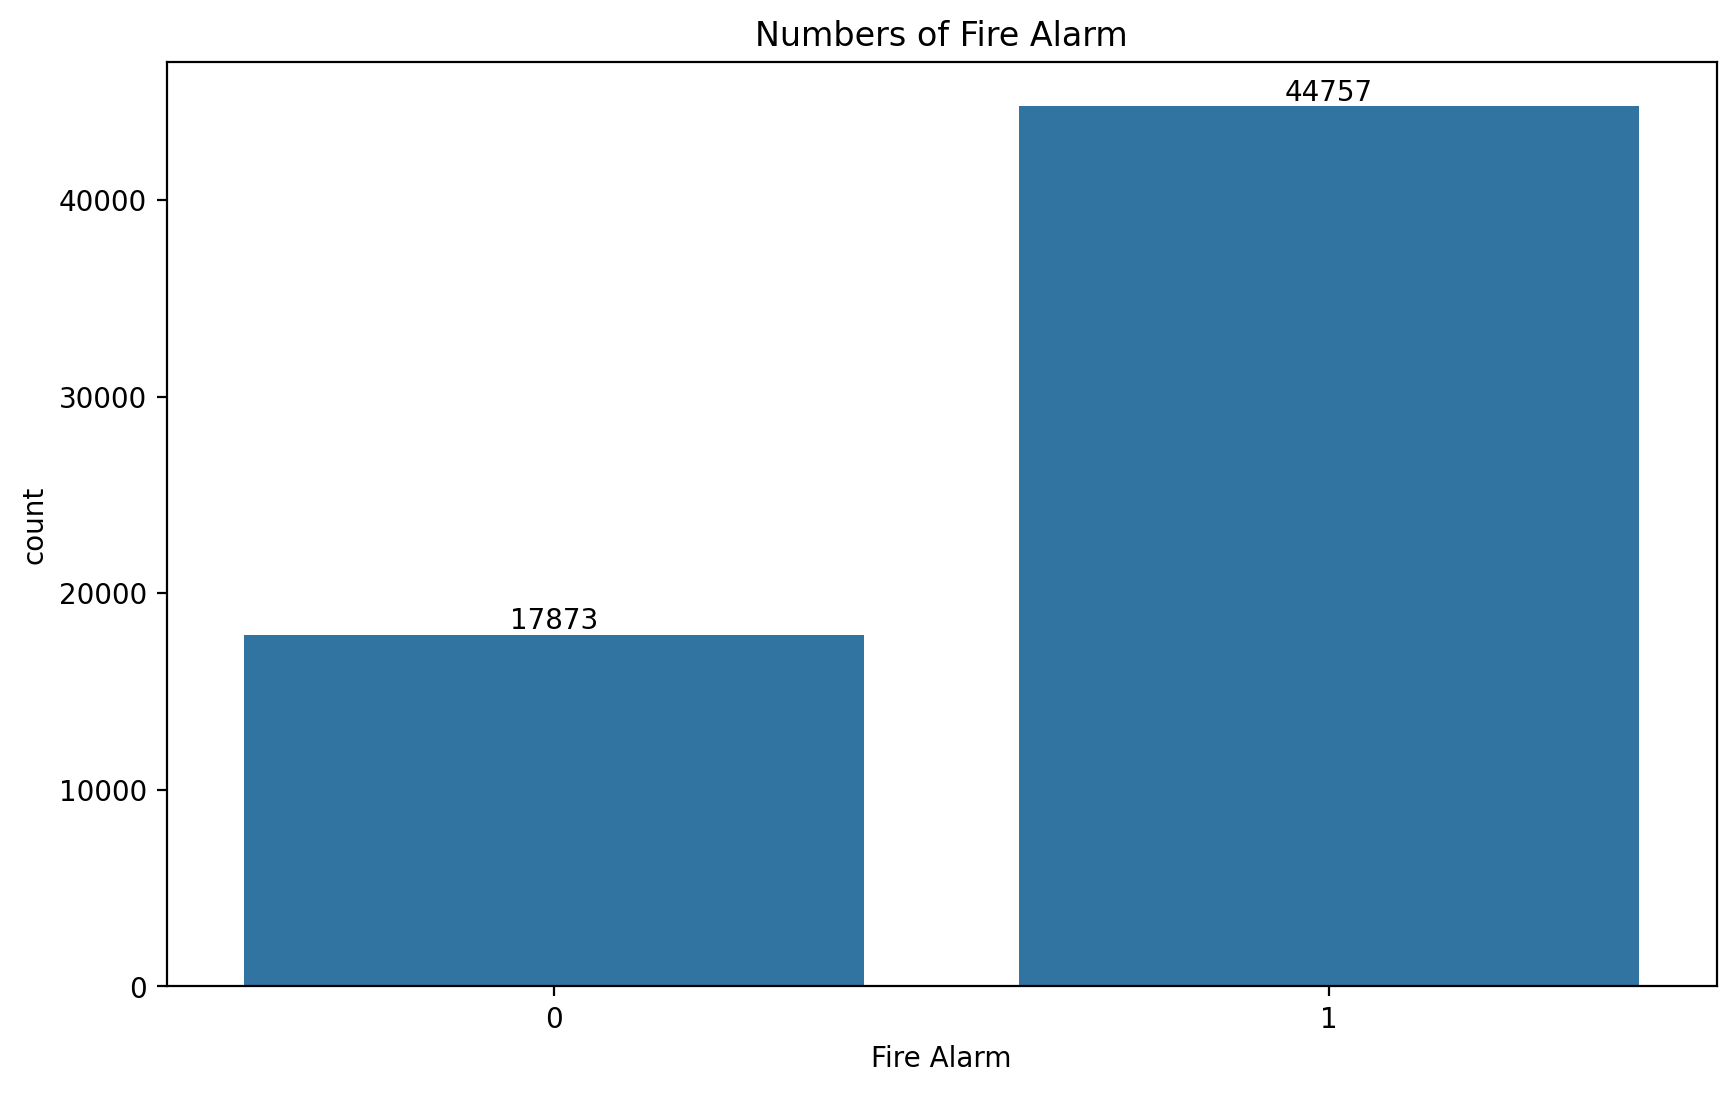

In [21]:
plt.figure(figsize = (10,6))
ax = sns.countplot(df, x='Fire Alarm')
ax.bar_label(ax.containers[0])
plt.title("Numbers of Fire Alarm")

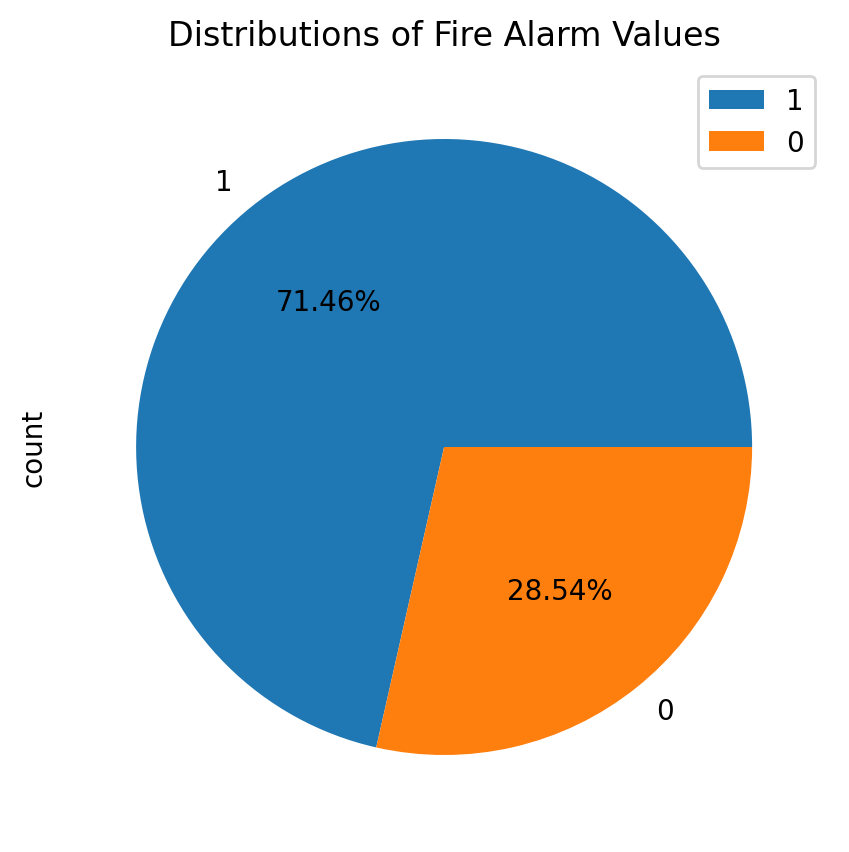

In [22]:
df['Fire Alarm'].value_counts().plot.pie( autopct = "%.2f%%")
plt.title("Distributions of Fire Alarm Values")
plt.legend()
plt.show()

* Most of the data took were during fire yes condition hence biasness in data needs to be taken care.

Above graph visualises strong positive correlation between concentration of PM1.0, PM2.5, NC0.5, NC2.5

## Univariate Analysis

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

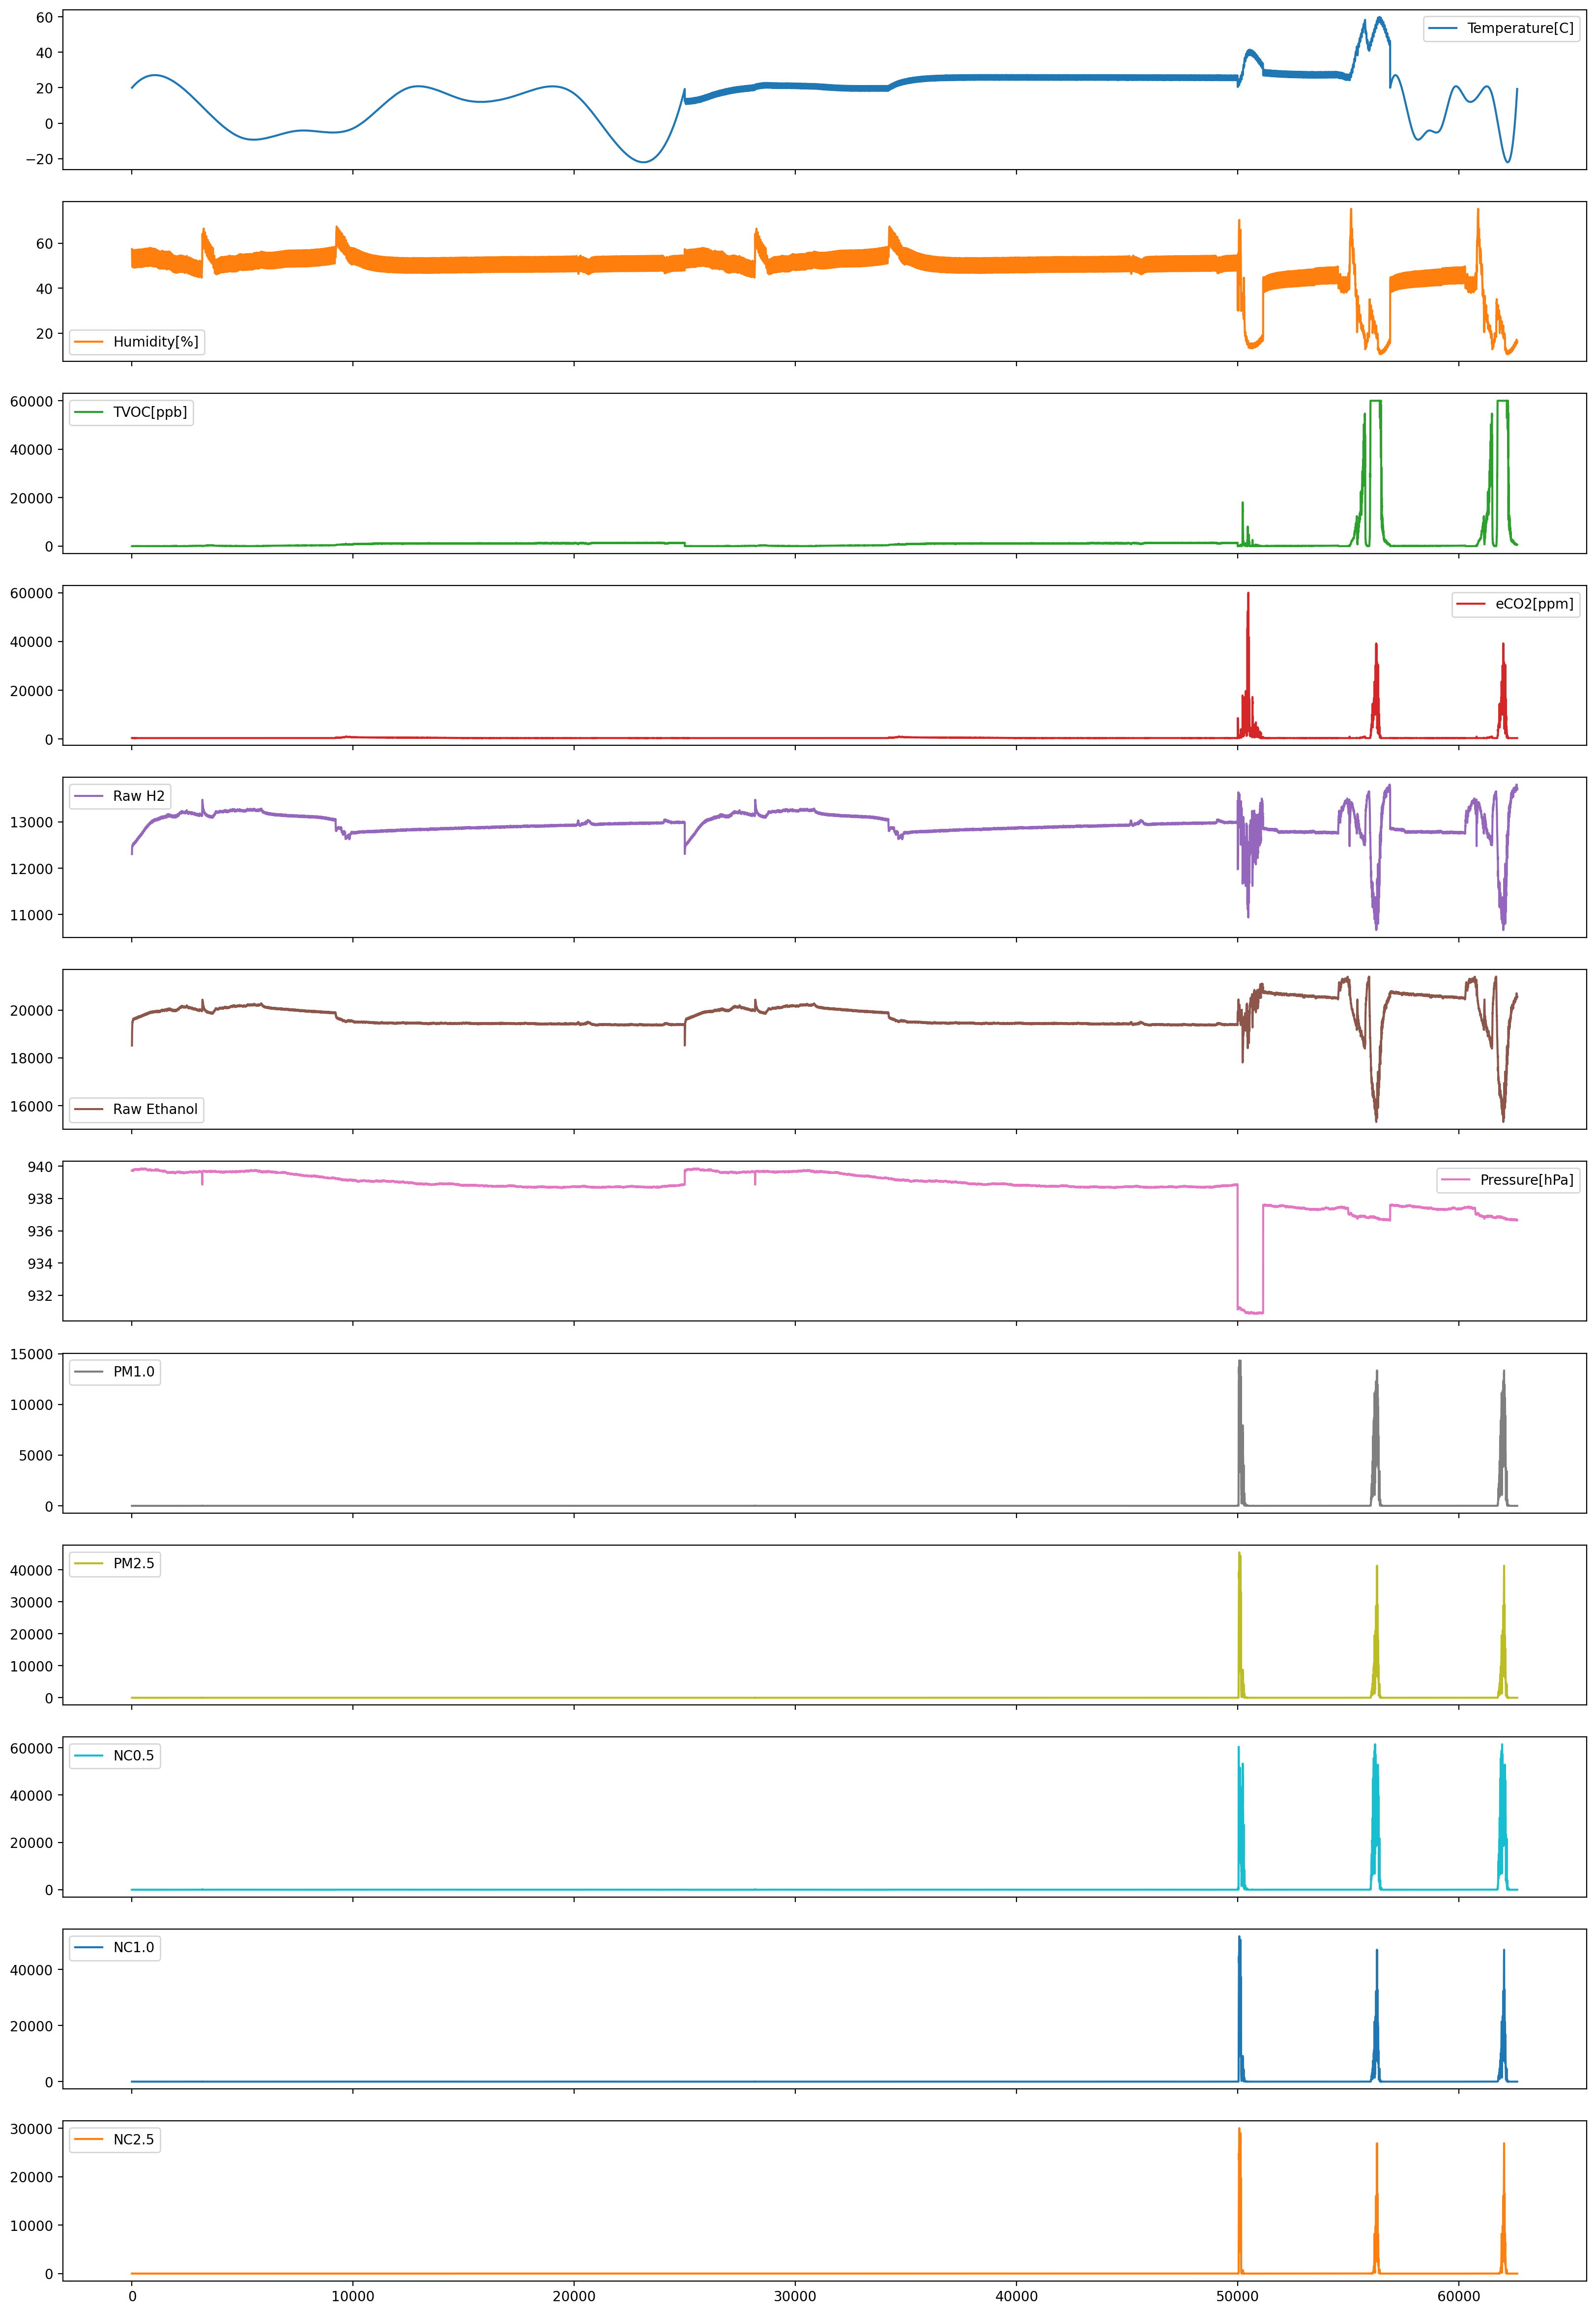

In [25]:
rcParams['figure.figsize'] = 20,30
df[['Temperature[C]','Humidity[%]','TVOC[ppb]','eCO2[ppm]','Raw H2','Raw Ethanol','Pressure[hPa]','PM1.0','PM2.5','NC0.5','NC1.0','NC2.5']].plot(subplots = True)

* from the above graph strong relationship is found between the variables
* lets clarify it by using correlation


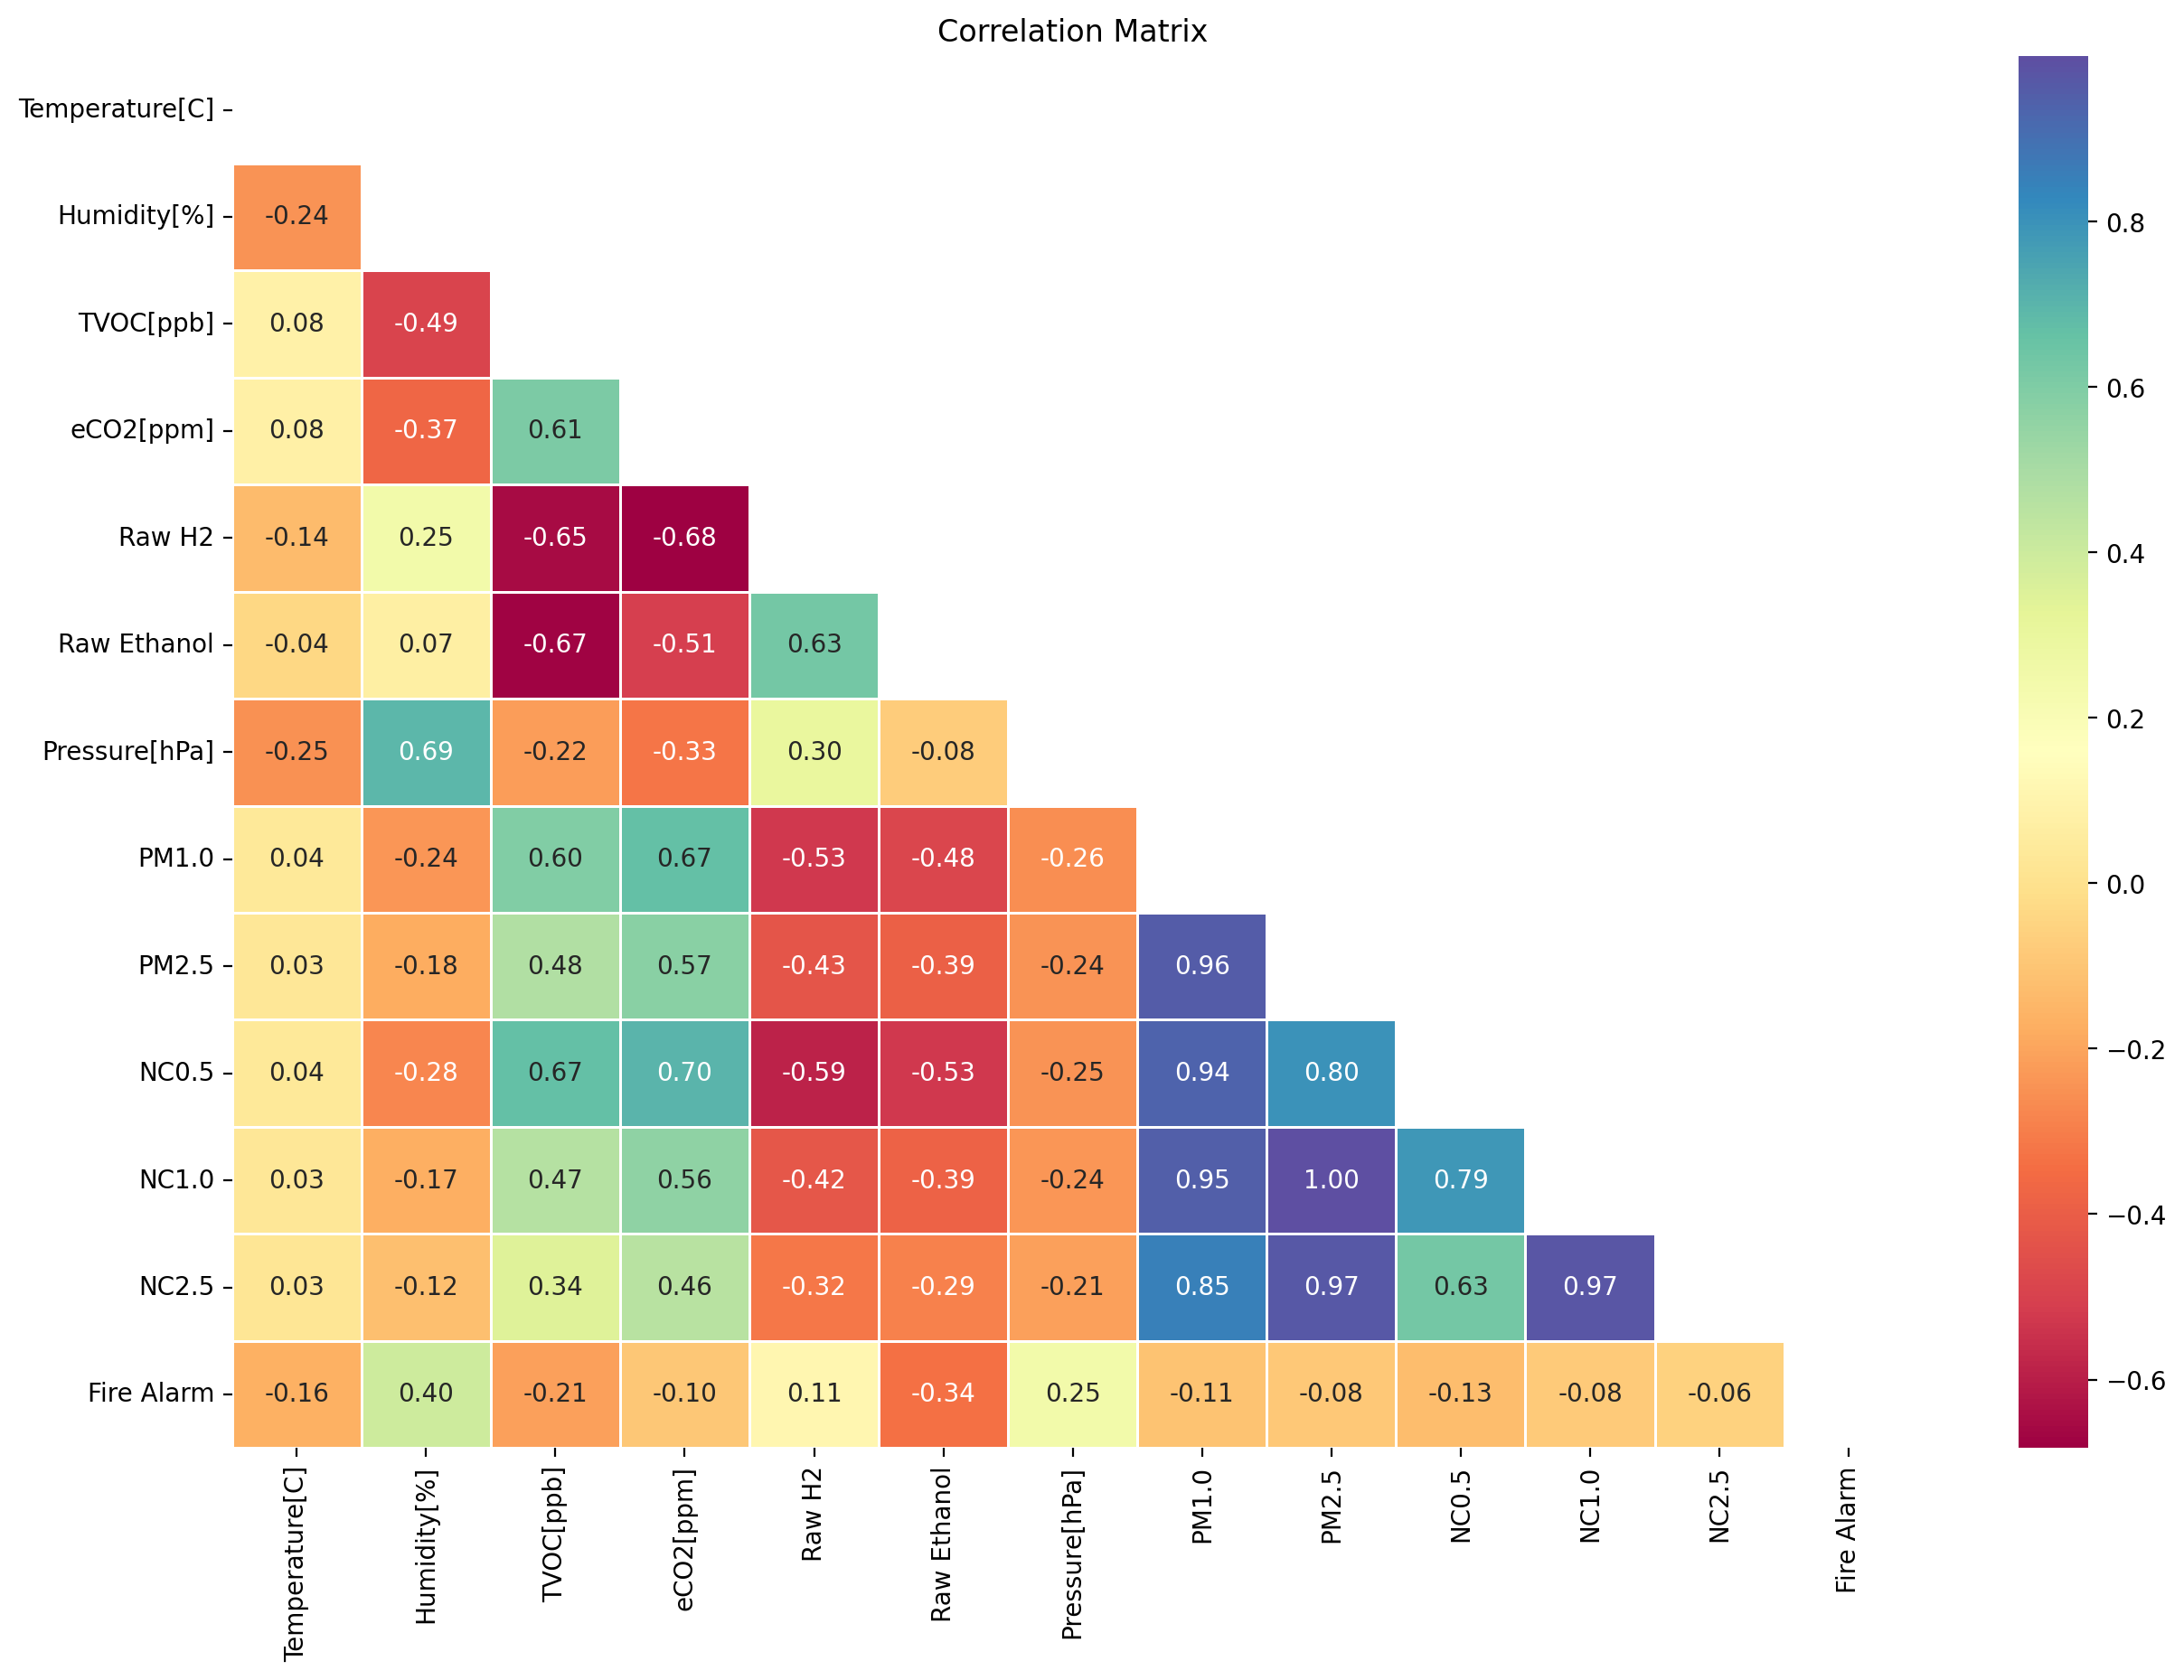

In [26]:
plt.figure(figsize = (15,10))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cormat = sns.heatmap(corr, mask=mask, annot=True, cmap='Spectral', linewidths=1, fmt=".2f")
cormat.set_title('Correlation Matrix')
plt.show()

There is a strong relation between the features

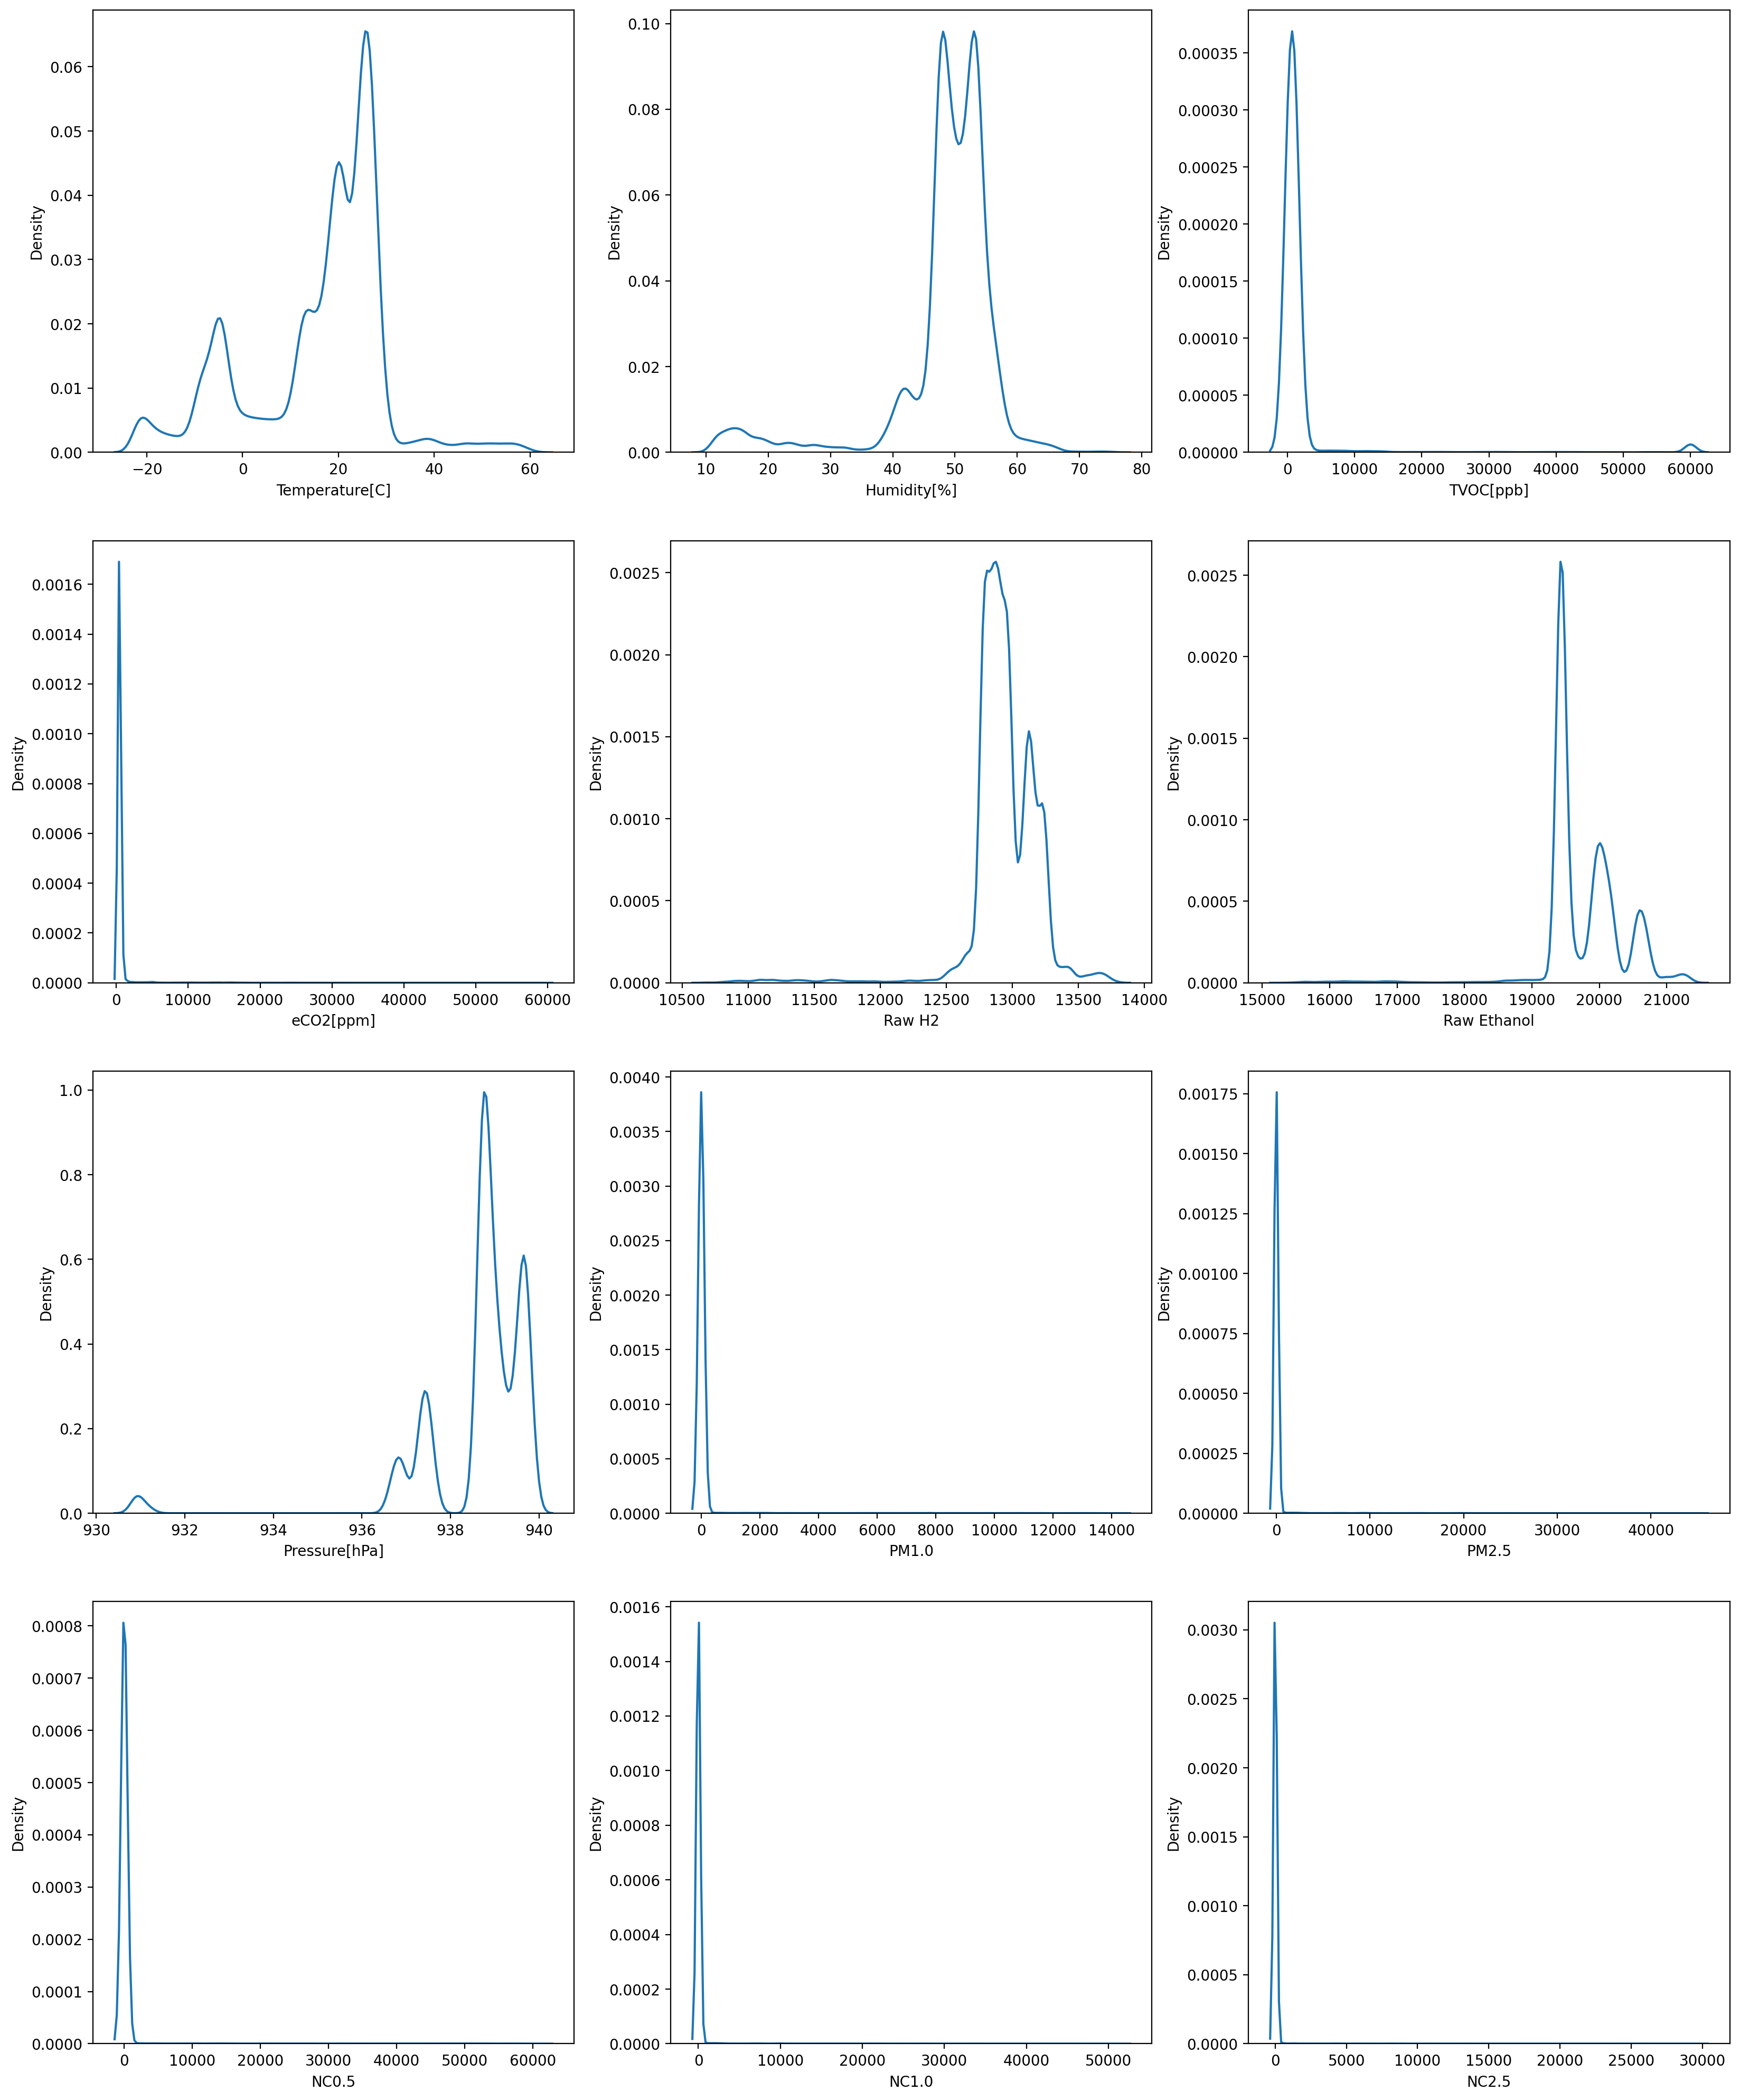

In [27]:
plt.figure(figsize=(20,25))
i=1
for col in df.drop('Fire Alarm',axis=1).columns:
    plt.subplot(4,3,i)
    sns.kdeplot(df[col])
    i+=1

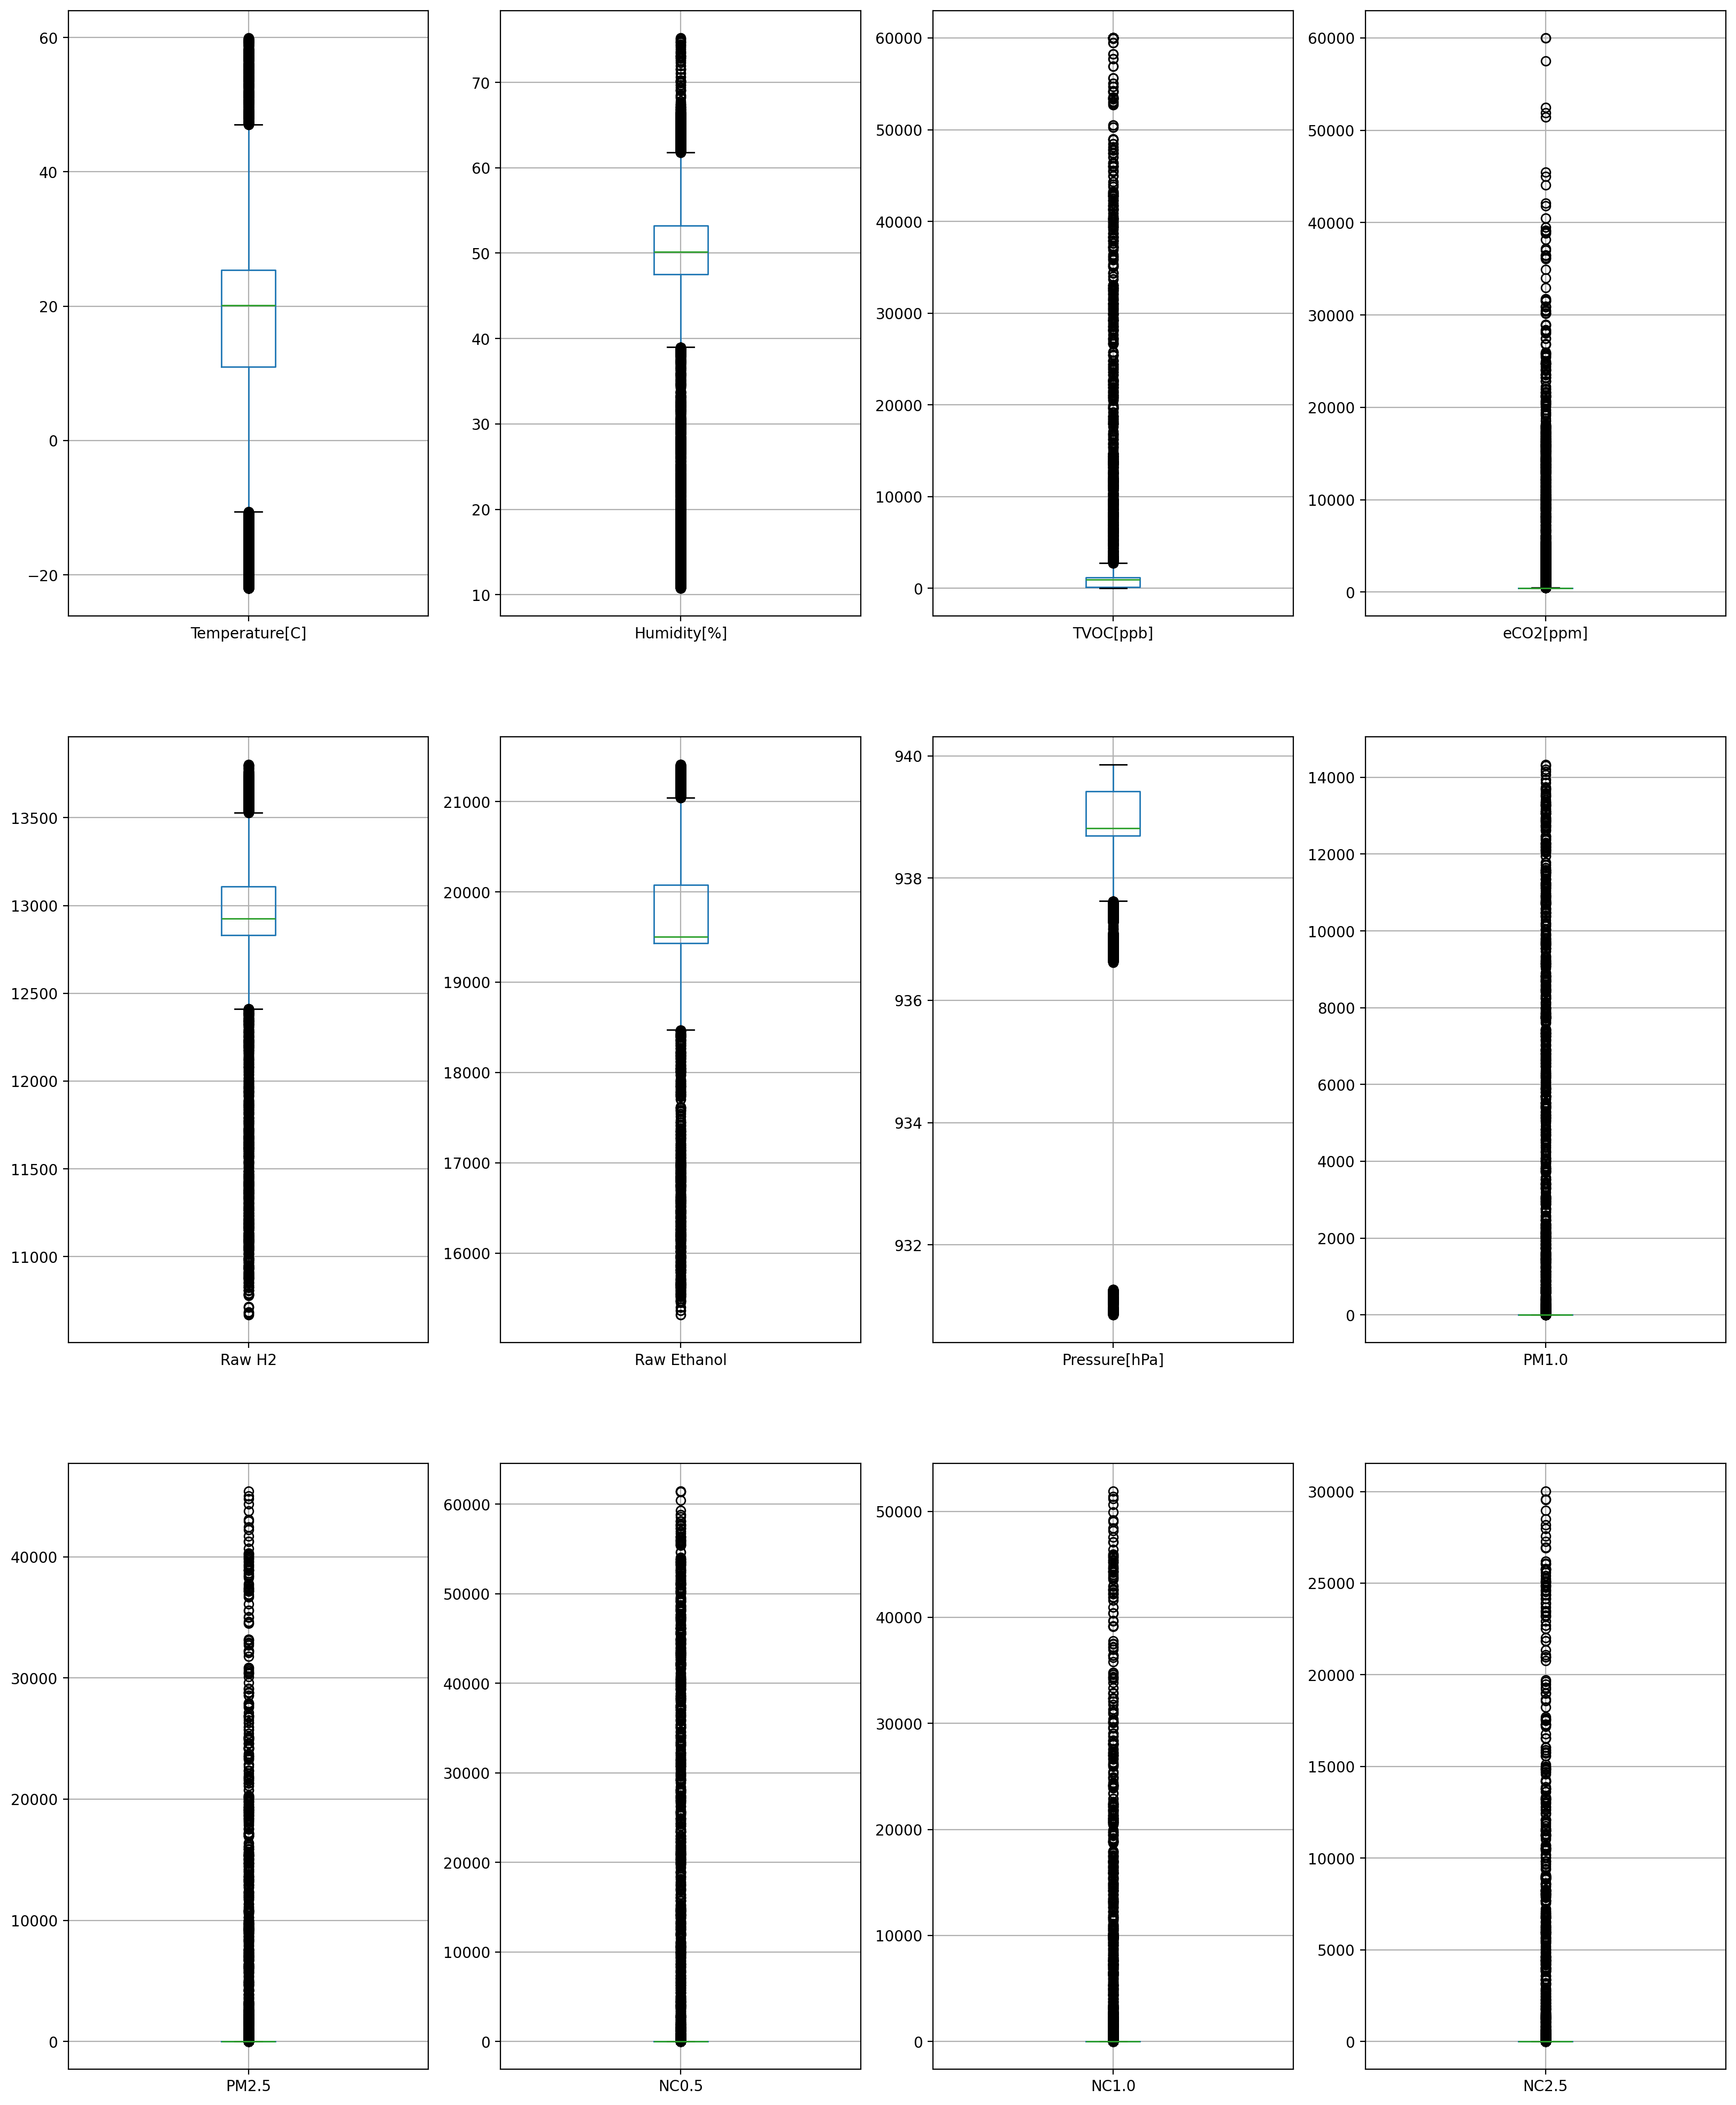

In [28]:
plt.figure(figsize=(20,25))
i=1
for col in df.drop('Fire Alarm',axis=1).columns:
    plt.subplot(3,4,i)
    df[[col]].boxplot()
    i+=1

## Bivariate Analysis

In [29]:
print(df.columns)

Index(['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
       'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0',
       'NC2.5', 'Fire Alarm'],
      dtype='object')


In [30]:
cols = ['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]','Pressure[hPa]']

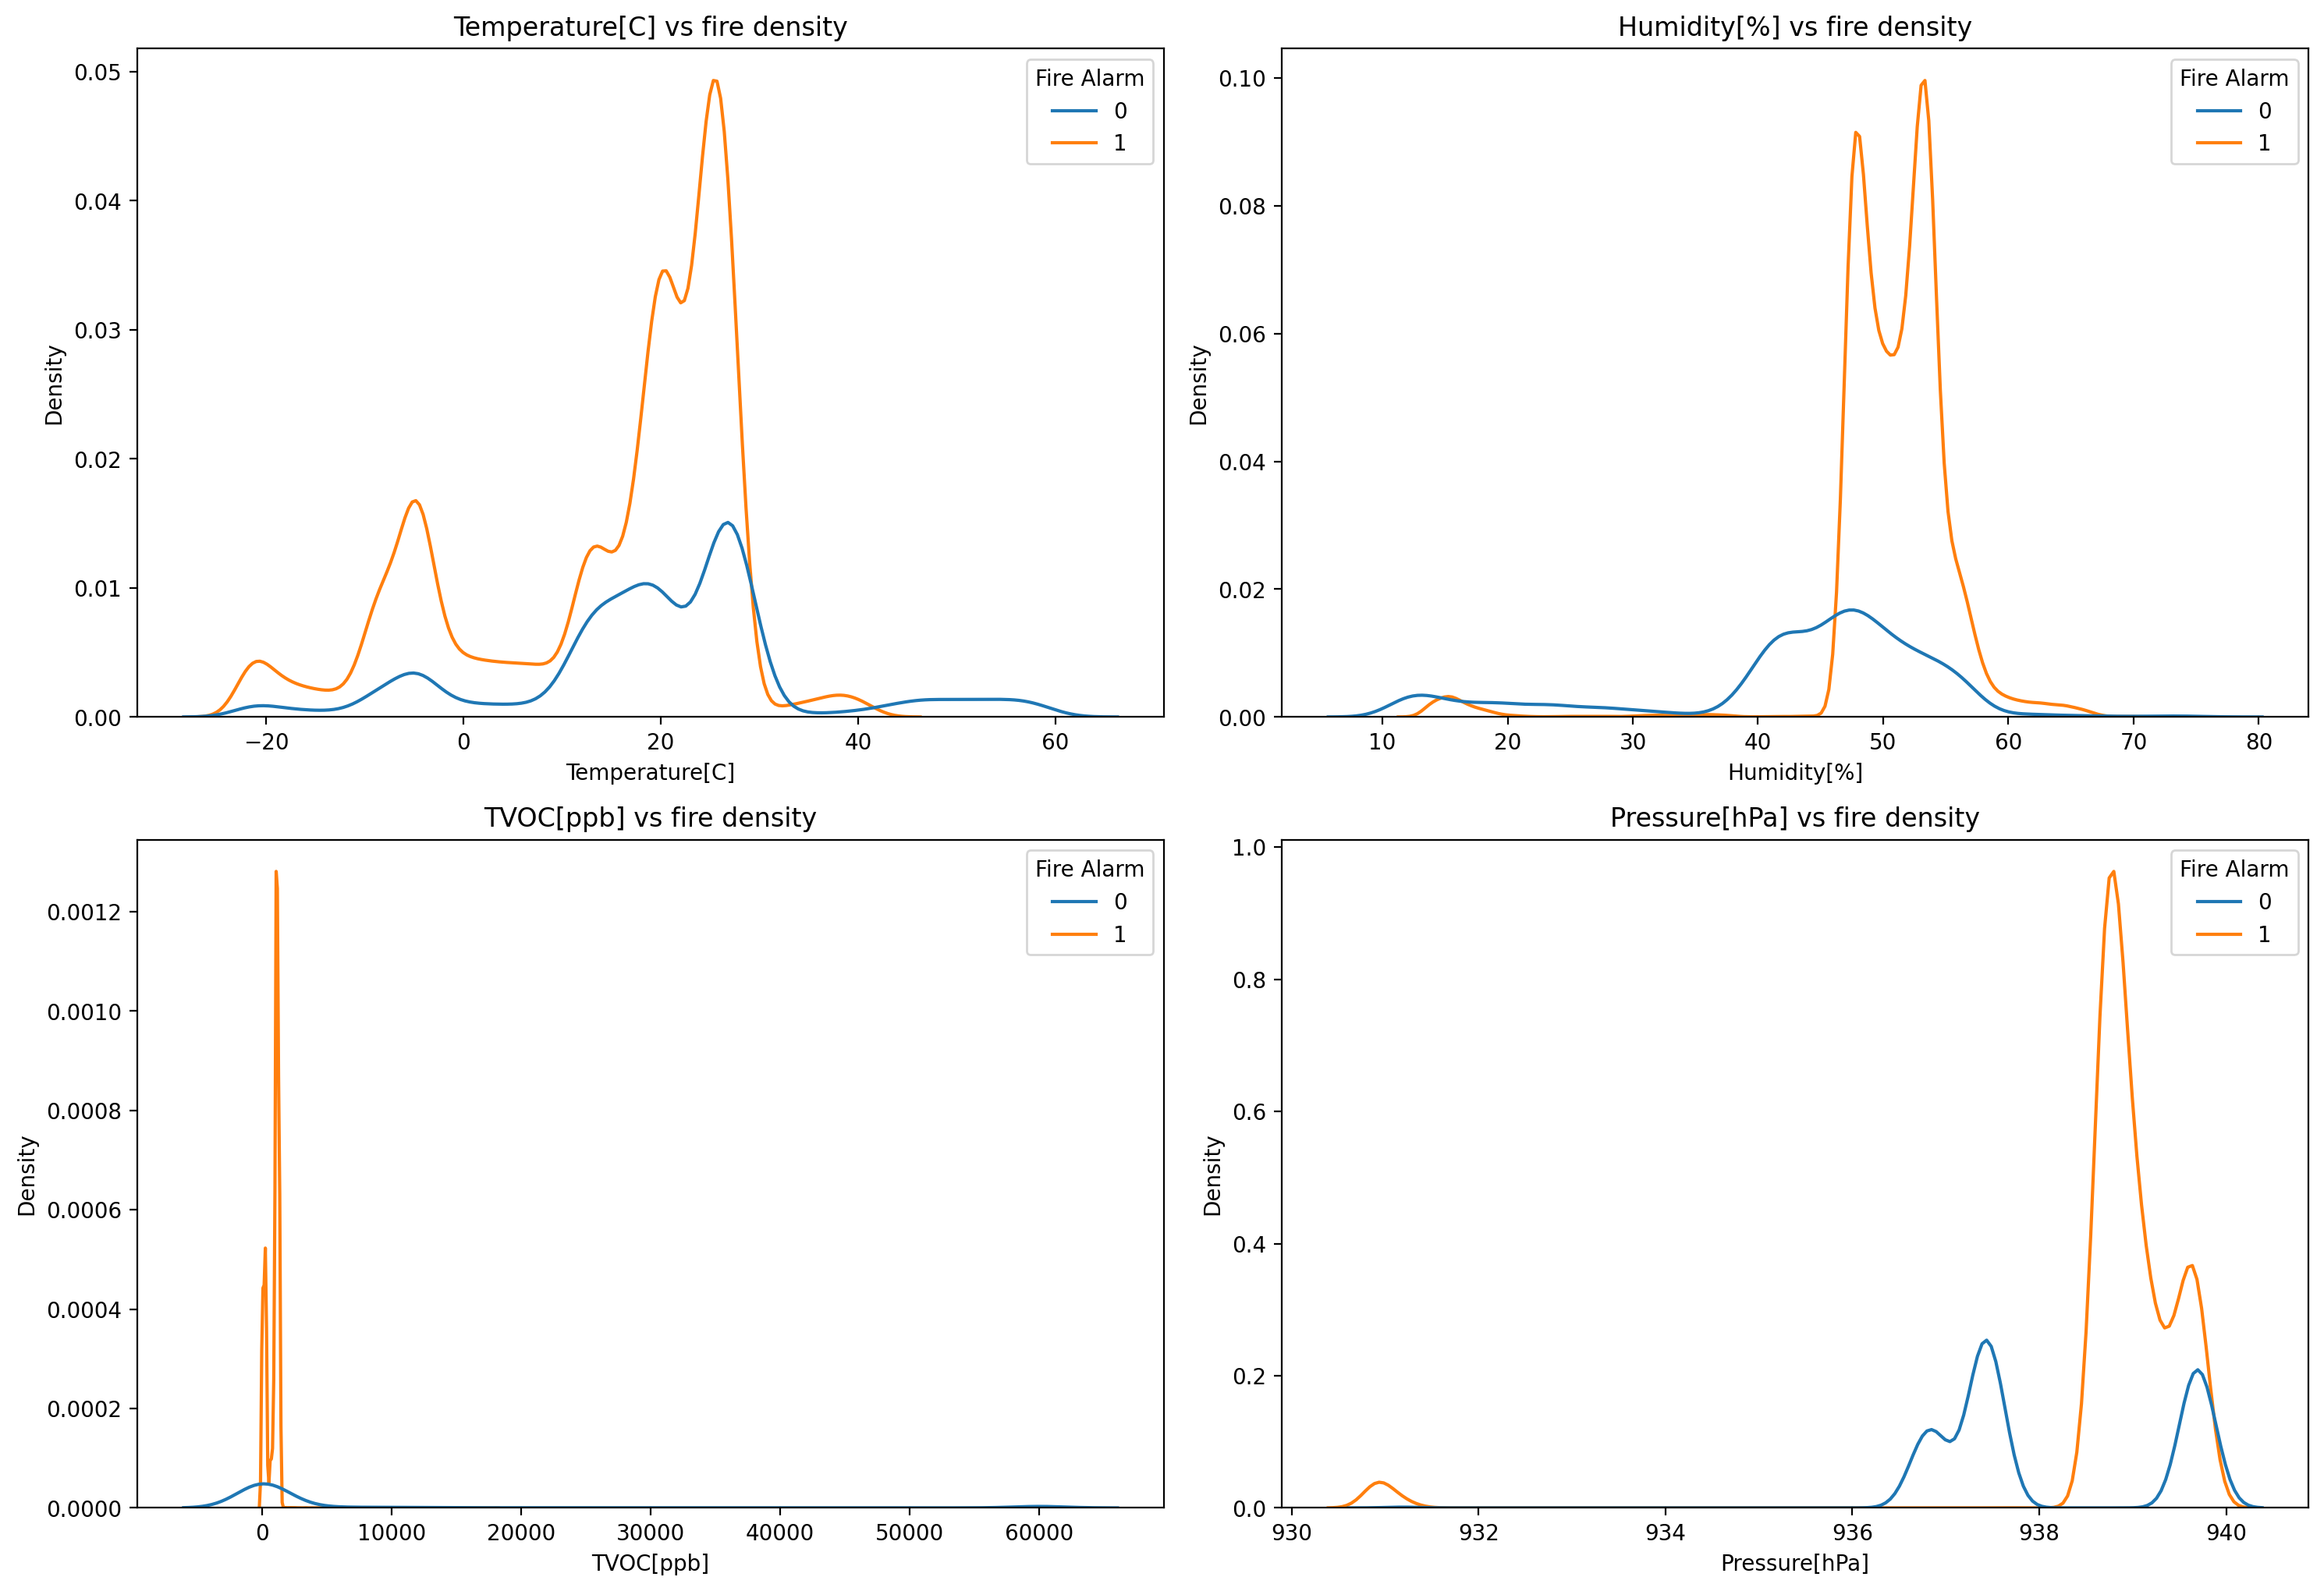

In [31]:

plt.figure(figsize=(15,20))
i=1
for col in cols:
    plt.subplot(4,2,i)
    sns.kdeplot(data=df, x=col, hue='Fire Alarm')
    plt.title(f'{col} vs fire density')
#     plt.legend(loc='upper left', labels=['Fire', 'No Fire'])
    i+=1
plt.tight_layout()

## Observations
- At diffrent temperatures Fire may have higher density over No Fire
- Humidity and Pressure seems to seen more when theres a fire

In [32]:
df['TVOC[ppb]'].describe()

count    62630.000000
mean      1942.057528
std       7811.589055
min          0.000000
25%        130.000000
50%        981.000000
75%       1189.000000
max      60000.000000
Name: TVOC[ppb], dtype: float64

##### Since there is a huge difference between mean and max value of TVOC lets only look at the values between 0 to 5000ppb to understand better

In [33]:
filtered_tvoc = df[df['TVOC[ppb]']<5000]
filtered_tvoc.shape[0]

60469

Text(0.5, 1.0, 'Total volatile compounds within range of 5000ppb vs fire density')

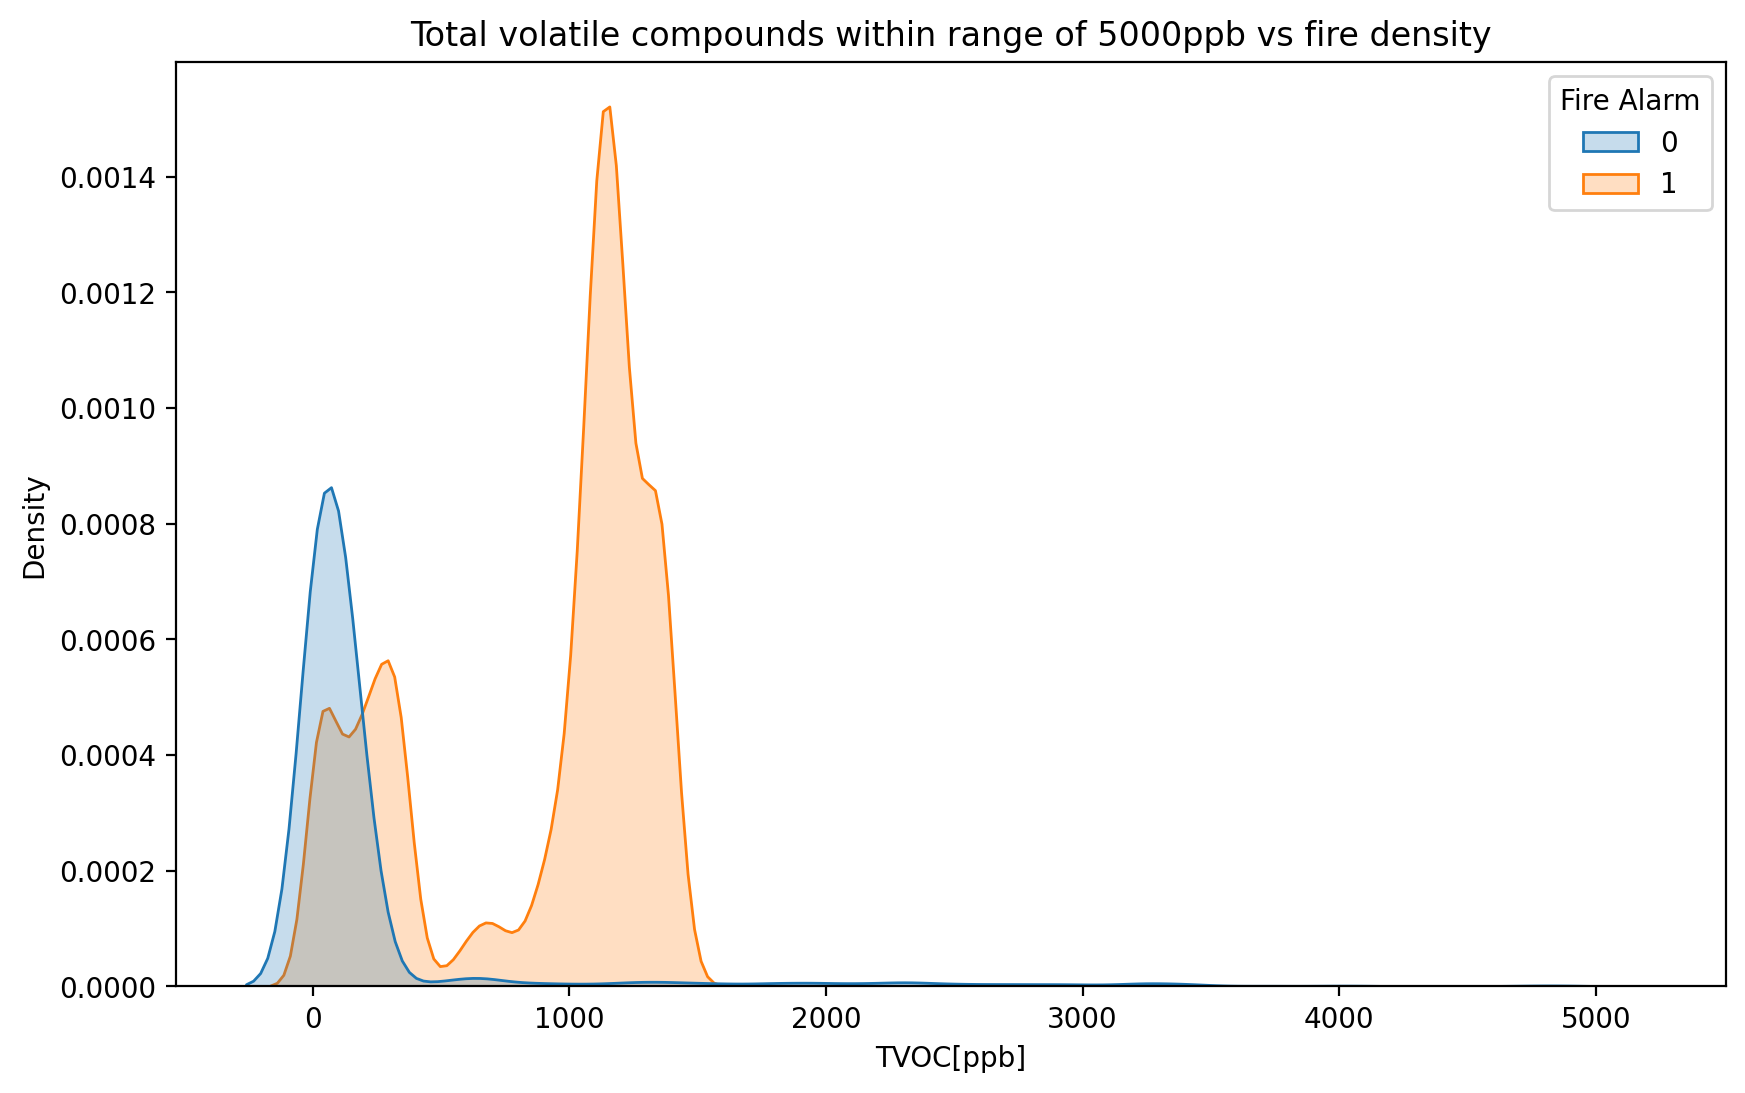

In [34]:
plt.figure(figsize=(10,6))
sns.kdeplot( data=filtered_tvoc, x='TVOC[ppb]', hue='Fire Alarm',fill = True)
plt.title('Total volatile compounds within range of 5000ppb vs fire density')

From visualisation of above graph it can be analysed that density of fire is are highest when Total Volatile Organic Compounds concetration is about 1000 to 1500 and at higher concentration of TVOC spread of density of yes fire and no fire is almost same

In [35]:
df.columns

Index(['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
       'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0',
       'NC2.5', 'Fire Alarm'],
      dtype='object')

<Figure size 1000x800 with 0 Axes>

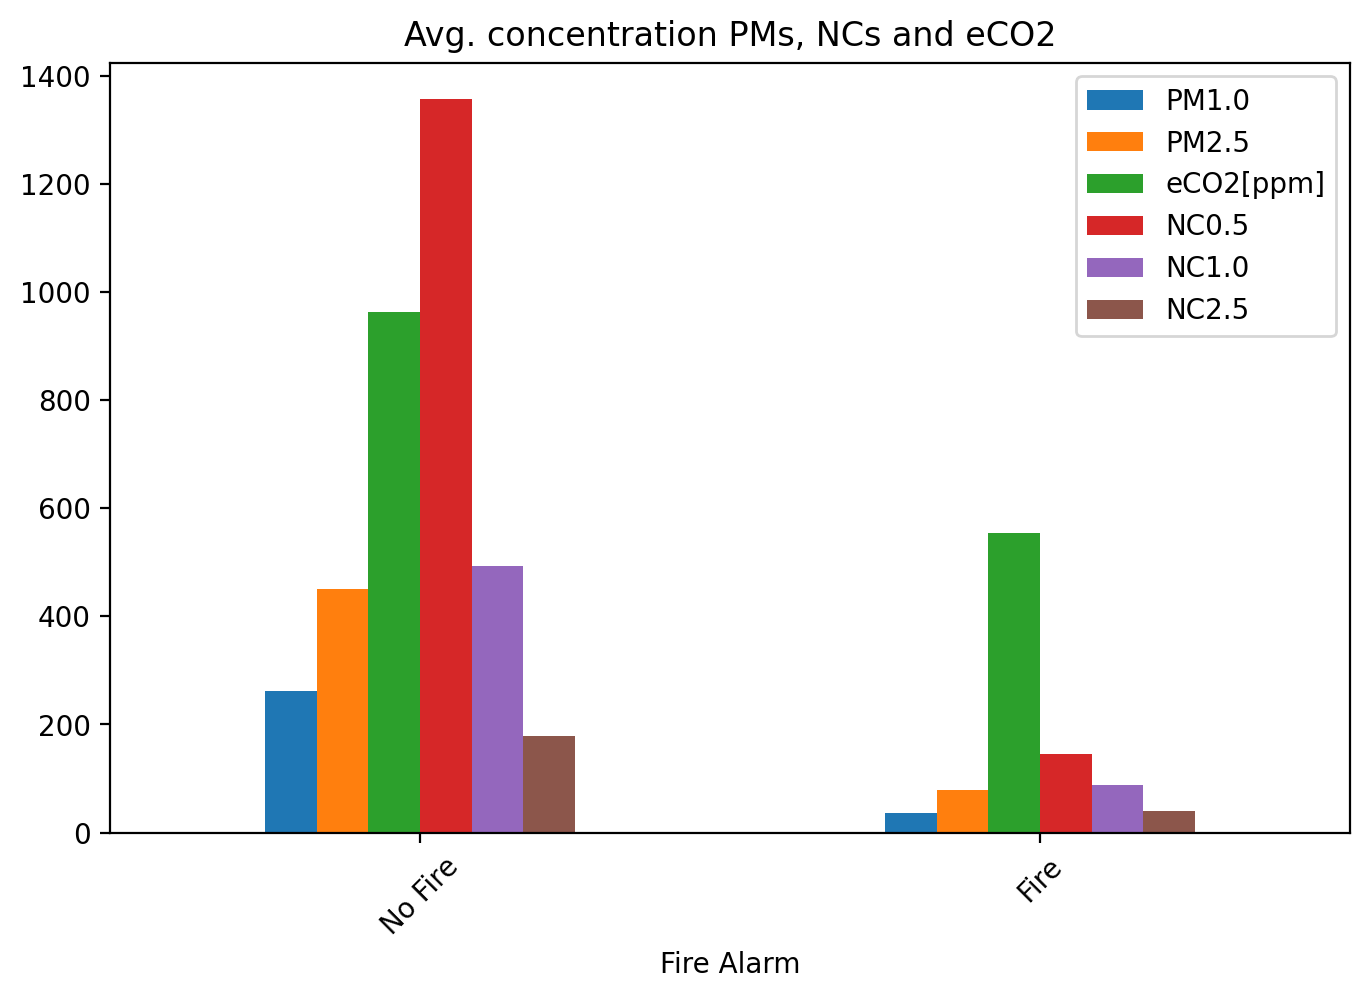

In [36]:
plt.figure(figsize=(10,8))
rcParams["figure.figsize"] = 8, 5
df.groupby(['Fire Alarm'])[['PM1.0','PM2.5','eCO2[ppm]','NC0.5', 'NC1.0',
       'NC2.5']].mean().plot(kind = 'bar')
plt.xticks(ticks = [0,1],labels=['No Fire','Fire'], rotation=45)
plt.title('Avg. concentration PMs, NCs and eCO2')
plt.show()

During no fire cases average value of concetration of PMs, NCs and eCO2 are pretty high.

## Creating Categorical values

In [37]:
df_categorial = df.copy(deep=True)
df_categorial.sample(10)

Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  Raw H2  Raw Ethanol  \
48840          26.980        47.87       1392        403   12982        19379   
34180          18.500        57.16        377        400   13038        19871   
58528          -4.908        47.90         94        400   12781        20623   
7522           -4.190        54.35        284        400   13116        19980   
14136          17.054        50.46       1155        500   12853        19447   
6409           -7.352        55.18        202        400   13155        20074   
432            24.847        51.89         33        400   12722        19737   
34876          24.510        51.01        686        778   12744        19569   
54987          24.750        45.55          0        400   13298        21178   
7070           -5.118        56.15        244        400   13129        20022   

       Pressure[hPa]  PM1.0  PM2.5  NC0.5  NC1.0  NC2.5  Fire Alarm  
48840        938.686   1.88   1.95  12.94  2.018  0.046           1  
34180        939.262   0.28   0.29   1.91  0.298  0.007           1  
58528        937.417   1.75   1.82  12.05  1.879  0.042           0  
7522         939.480   0.55   0.57   3.75  0.585  0.013           1  
14136        938.907   1.86   1.93  12.78  1.993  0.045           1  
6409         939.634   0.81   0.84   5.54  0.864  0.020           1  
432          939.852   0.14   0.18   0.91  0.185  0.030           0  
34876        939.160   3.02   3.14  20.80  3.243  0.073           1  
54987        937.325   1.58   1.65  10.91  1.701  0.038           0  
7070         939.567   0.33   0.34   2.28  0.356  0.008           1

In [38]:
df_categorial.columns

Index(['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
       'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0',
       'NC2.5', 'Fire Alarm'],
      dtype='object')

In [39]:
def categorize_temperature(temperature):
      if temperature < 0:
        return 'very low'
      elif temperature < 10:
        return 'low'
      elif temperature < 20:
        return 'moderate'
      elif temperature < 30:
        return 'high'
      else:
        return 'very high'


df_categorial['TemperatureCat'] = df_categorial['Temperature[C]'].apply(categorize_temperature)
df_categorial[['Temperature[C]','TemperatureCat']].sample(8)

Temperature[C] TemperatureCat
30392          19.600       moderate
17060          14.460       moderate
43489          26.870           high
14632          14.639       moderate
25608          11.940       moderate
48633          24.310           high
40146          25.570           high
18699          20.496           high

In [40]:
def categorize_humidity(humidity):
      if humidity < 30:
        return 'low'
      elif temperature < 60:
        return 'moderate'
      else:
        return 'high'
    
df_categorial['HumidityCat'] = df_categorial['Humidity[%]'].map(lambda x: 'Low' if x<30 else ('moderate' if x<60 else 'high'))
df_categorial[['Humidity[%]','HumidityCat']].sample(8)

Humidity[%] HumidityCat
21693        49.11    moderate
6821         54.73    moderate
37946        52.96    moderate
61844        22.53         Low
10028        57.21    moderate
22369        53.55    moderate
17587        49.72    moderate
36944        48.54    moderate

In [41]:
df_categorial['FireAlarm'] = df_categorial['Fire Alarm'].map(lambda x: 'Yes' if x == 1 else 'No')
df_categorial[['FireAlarm']].sample(8)

FireAlarm
31709       Yes
8705        Yes
41941       Yes
34840       Yes
13599       Yes
5909        Yes
20322       Yes
37382       Yes

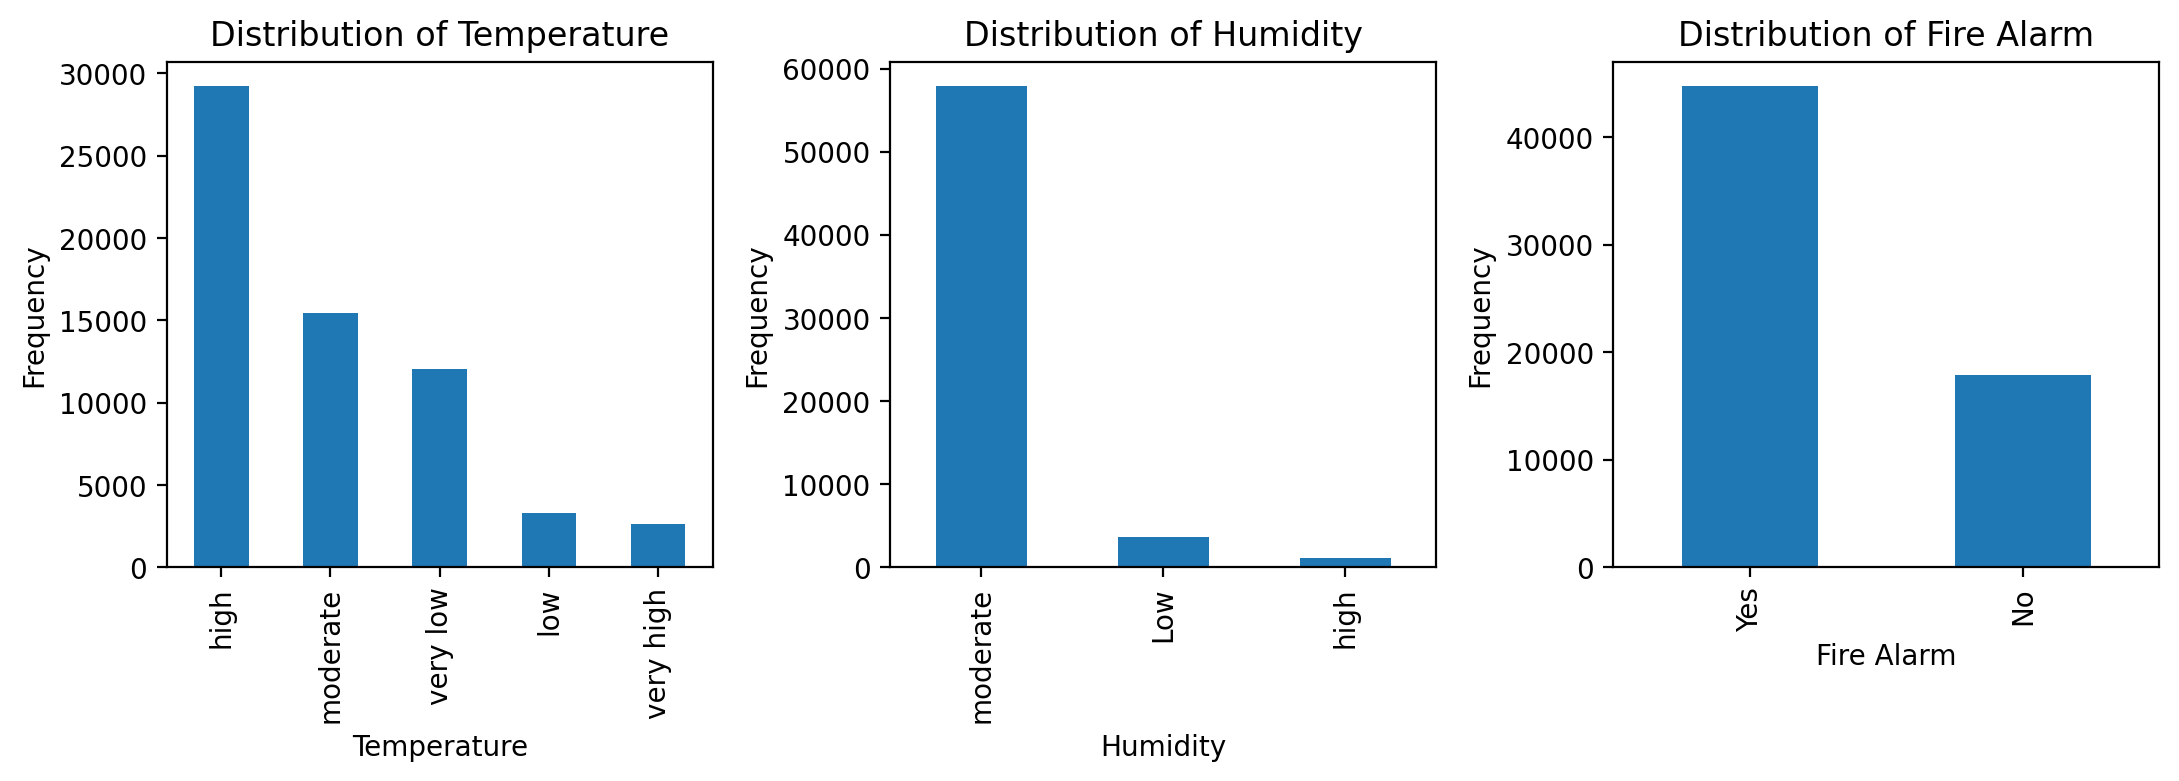

In [42]:
plt.figure(figsize = [11,4])

plt.subplot(1,3,1)
df_categorial['TemperatureCat'].value_counts().plot(kind = 'bar')
plt.title("Distribution of Temperature")
plt.xlabel("Temperature")
plt.ylabel("Frequency")

plt.subplot(1,3,2)
df_categorial['HumidityCat'].value_counts().plot(kind='bar')
plt.title("Distribution of Humidity")
plt.xlabel("Humidity")
plt.ylabel("Frequency")

plt.subplot(1,3,3)
df_categorial['FireAlarm'].value_counts().plot(kind='bar')
plt.title("Distribution of Fire Alarm")
plt.xlabel("Fire Alarm")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [43]:
df.sample(3)

Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  Raw H2  Raw Ethanol  \
31281          19.290        54.86        174        400   13160        20083   
16911          13.964        53.35       1138        406   12897        19443   
34735          23.270        57.41        688        863   12698        19562   

       Pressure[hPa]  PM1.0  PM2.5  NC0.5  NC1.0  NC2.5  Fire Alarm  
31281        939.649   0.97   1.00   6.64  1.036  0.023           1  
16911        938.752   2.32   2.41  15.99  2.494  0.056           1  
34735        939.153   2.60   2.70  17.88  2.788  0.063           1

In [44]:
df_categorial[['TemperatureCat','HumidityCat','FireAlarm']].sample(3)

TemperatureCat HumidityCat FireAlarm
47760           high    moderate       Yes
53327           high    moderate        No
36393           high    moderate       Yes

## Data Modeling

In [45]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.tree import ExtraTreeClassifier 

from sklearn.metrics import confusion_matrix, classification_report,auc,recall_score,precision_score,roc_curve,accuracy_score,precision_recall_curve

import time

import warnings
warnings.filterwarnings('ignore')

In [46]:
X = df.drop("Fire Alarm",axis=1)
Y = df['Fire Alarm']

In [47]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50104, 12)
(12526, 12)
(50104,)
(12526,)


In [48]:
ss = StandardScaler()
X_train = ss.fit_transform(x_train)
X_test = ss.transform(x_test)

In [49]:
models = [KNeighborsClassifier(),SGDClassifier(),LogisticRegression(),RandomForestClassifier(),GradientBoostingClassifier(),
         AdaBoostClassifier(),BaggingClassifier(),SVC(),GaussianNB(),DummyClassifier(),ExtraTreeClassifier()]

In [50]:
Name = []
Accuracy = []
Precision = []
Recall = []
Time_Taken = []
for model in models:
    Name.append(type(model).__name__)
    begin = time.time()
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    end = time.time()
    accuracyScore = accuracy_score(prediction,y_test)
    Accuracy.append(accuracyScore)
    precisionScore = precision_score(prediction,y_test)
    Precision.append(precisionScore)
    recallScore = recall_score(prediction,y_test)
    Recall.append(recallScore)
    Time_Taken.append(end-begin)

In [51]:
Dict = {'Name':Name,'Accuracy':Accuracy,'Recall':Recall,'Precision':Precision,'Time Taken':Time_Taken}
model_df = pd.DataFrame(Dict)
model_df

Name  Accuracy    Recall  Precision  Time Taken
0         KNeighborsClassifier  0.998164  0.998208   0.999215    1.153200
1                SGDClassifier  0.913540  0.932084   0.947652    0.110129
2           LogisticRegression  0.897972  0.909286   0.951687    0.096591
3       RandomForestClassifier  1.000000  1.000000   1.000000    4.515897
4   GradientBoostingClassifier  0.999521  0.999440   0.999888   11.781371
5           AdaBoostClassifier  0.999521  0.999440   0.999888    2.849509
6            BaggingClassifier  0.999840  0.999888   0.999888    1.366327
7                          SVC  0.968306  0.964169   0.992378   15.997714
8                   GaussianNB  0.766326  0.761655   0.977917    0.012007
9              DummyClassifier  0.712199  0.712199   1.000000    0.001000
10         ExtraTreeClassifier  0.999122  0.999328   0.999440    0.014000

In [52]:
def plot_importance(model, features, num=len(X)):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()

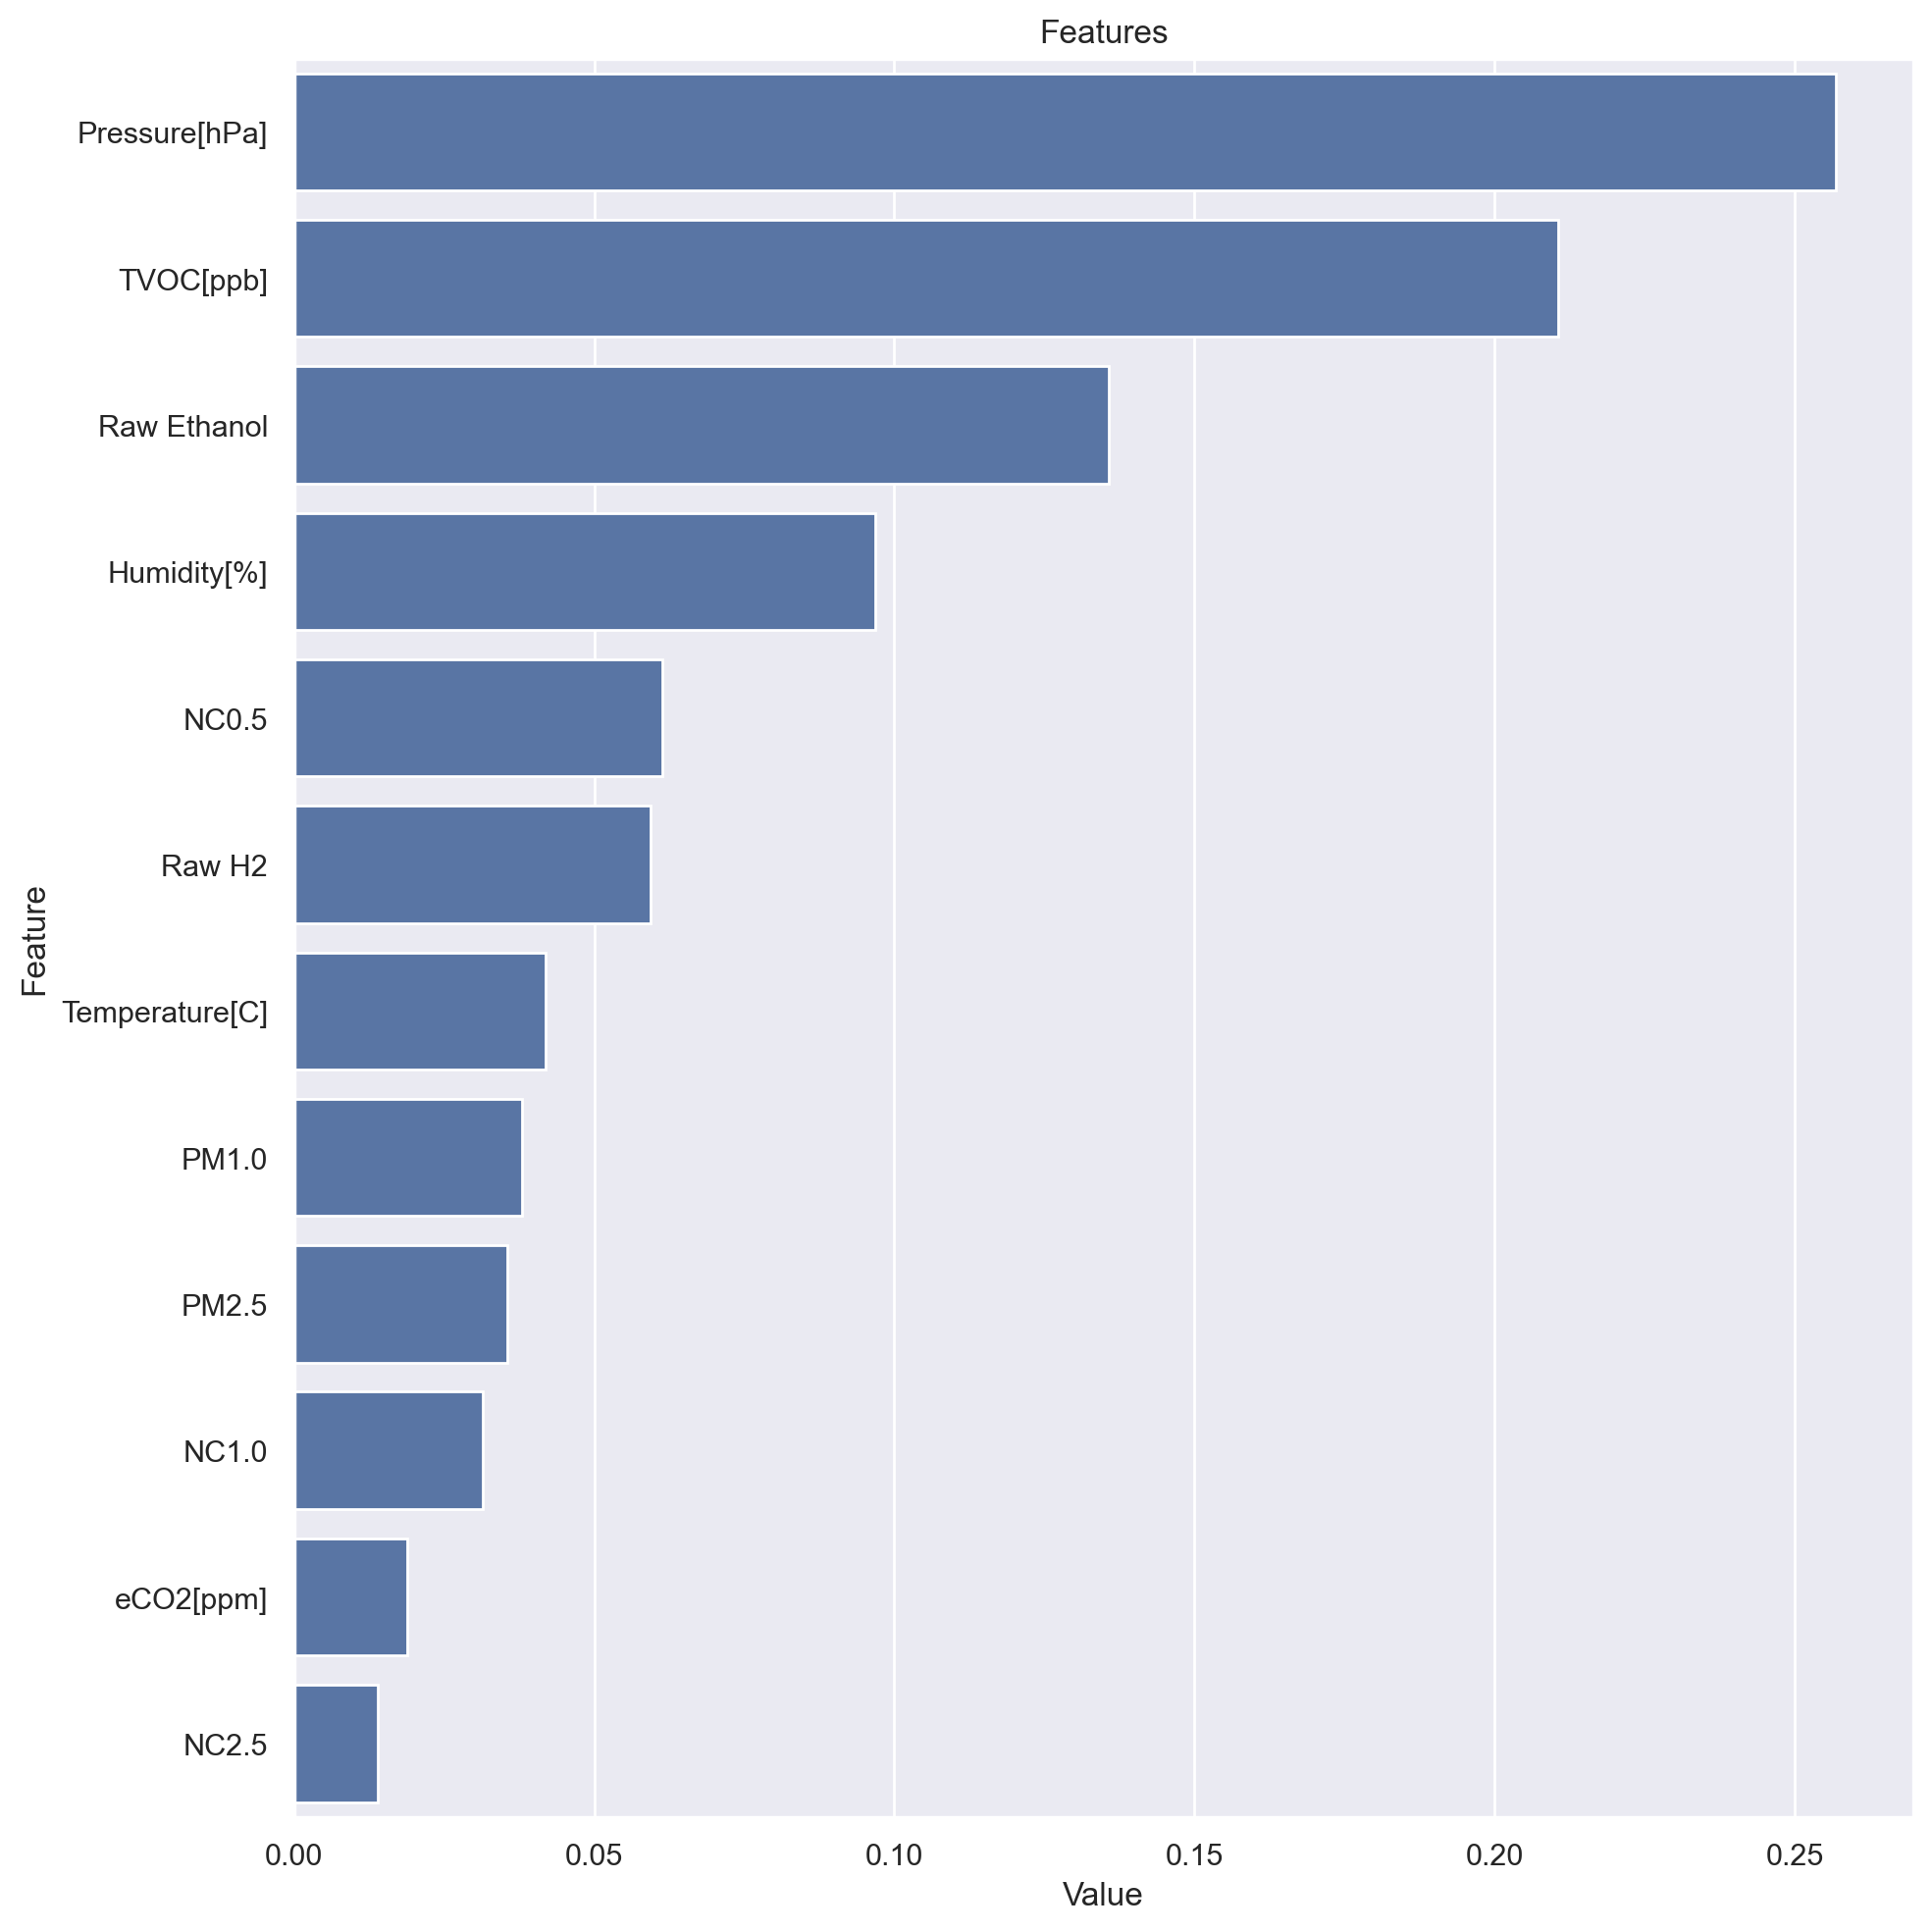

In [53]:
plot_importance(RandomForestClassifier().fit(X_train,y_train), X)

## Random Forest Classifier

In [54]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [55]:
y_pred_rf = rf_model.predict(X_test)

In [56]:
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_rf))
print()
print("Classification Report:\n",classification_report(y_test,y_pred_rf))


Confusion Matrix:
 [[3605    0]
 [   0 8921]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3605
           1       1.00      1.00      1.00      8921

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526



## Logistic regression

<Axes: ylabel='Feature'>

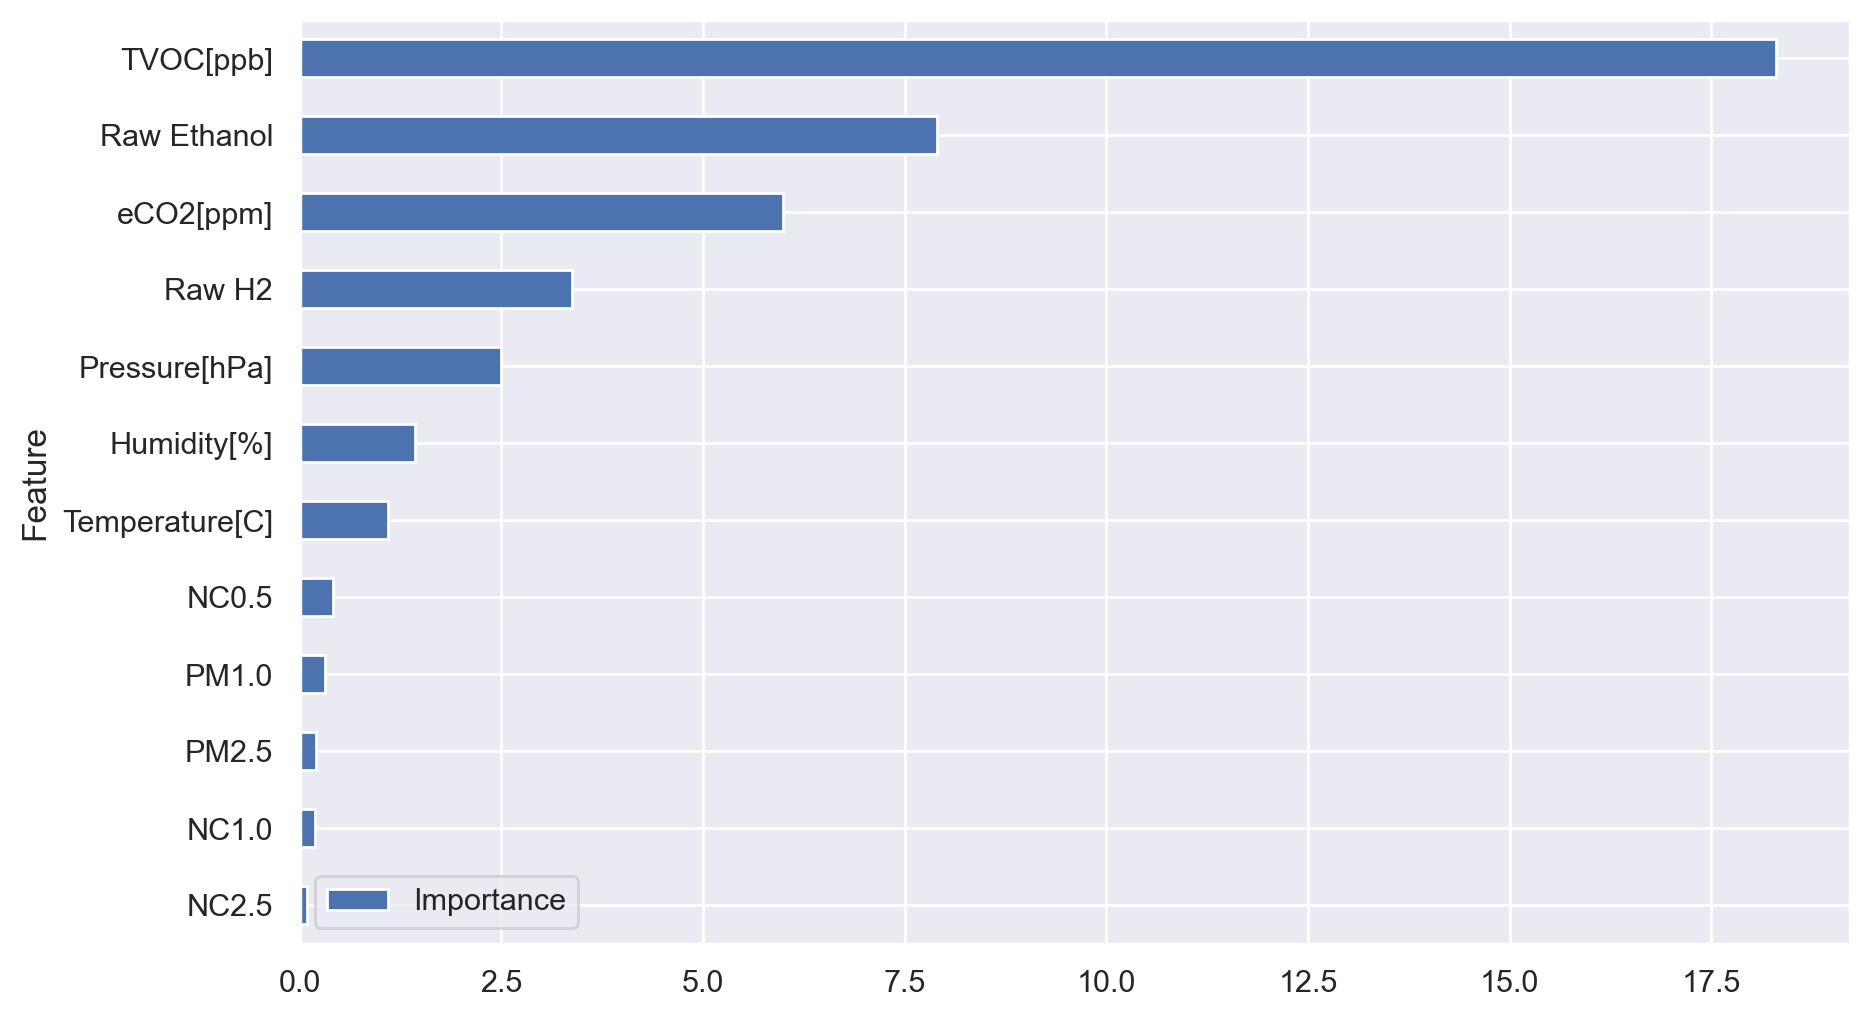

In [57]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)


coefficients = lr_model.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [58]:
lg_model = LogisticRegression()
lg_model.fit(X_train,y_train)

LogisticRegression()

In [59]:
y_pred = lg_model.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [60]:
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print()
print("Classification Report:\n",classification_report(y_test,y_pred))

Confusion Matrix:
 [[2758  847]
 [ 431 8490]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.77      0.81      3605
           1       0.91      0.95      0.93      8921

    accuracy                           0.90     12526
   macro avg       0.89      0.86      0.87     12526
weighted avg       0.90      0.90      0.90     12526



## ExtraTree Classifier

In [61]:
tc_model = ExtraTreeClassifier()
tc_model.fit(X_train,y_train)


ExtraTreeClassifier()

In [62]:
y_pred_tc = tc_model.predict(X_test)

In [63]:
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_tc))
print()
print("Classification Report:\n",classification_report(y_test,y_pred_tc))

Confusion Matrix:
 [[3605    0]
 [   0 8921]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3605
           1       1.00      1.00      1.00      8921

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526



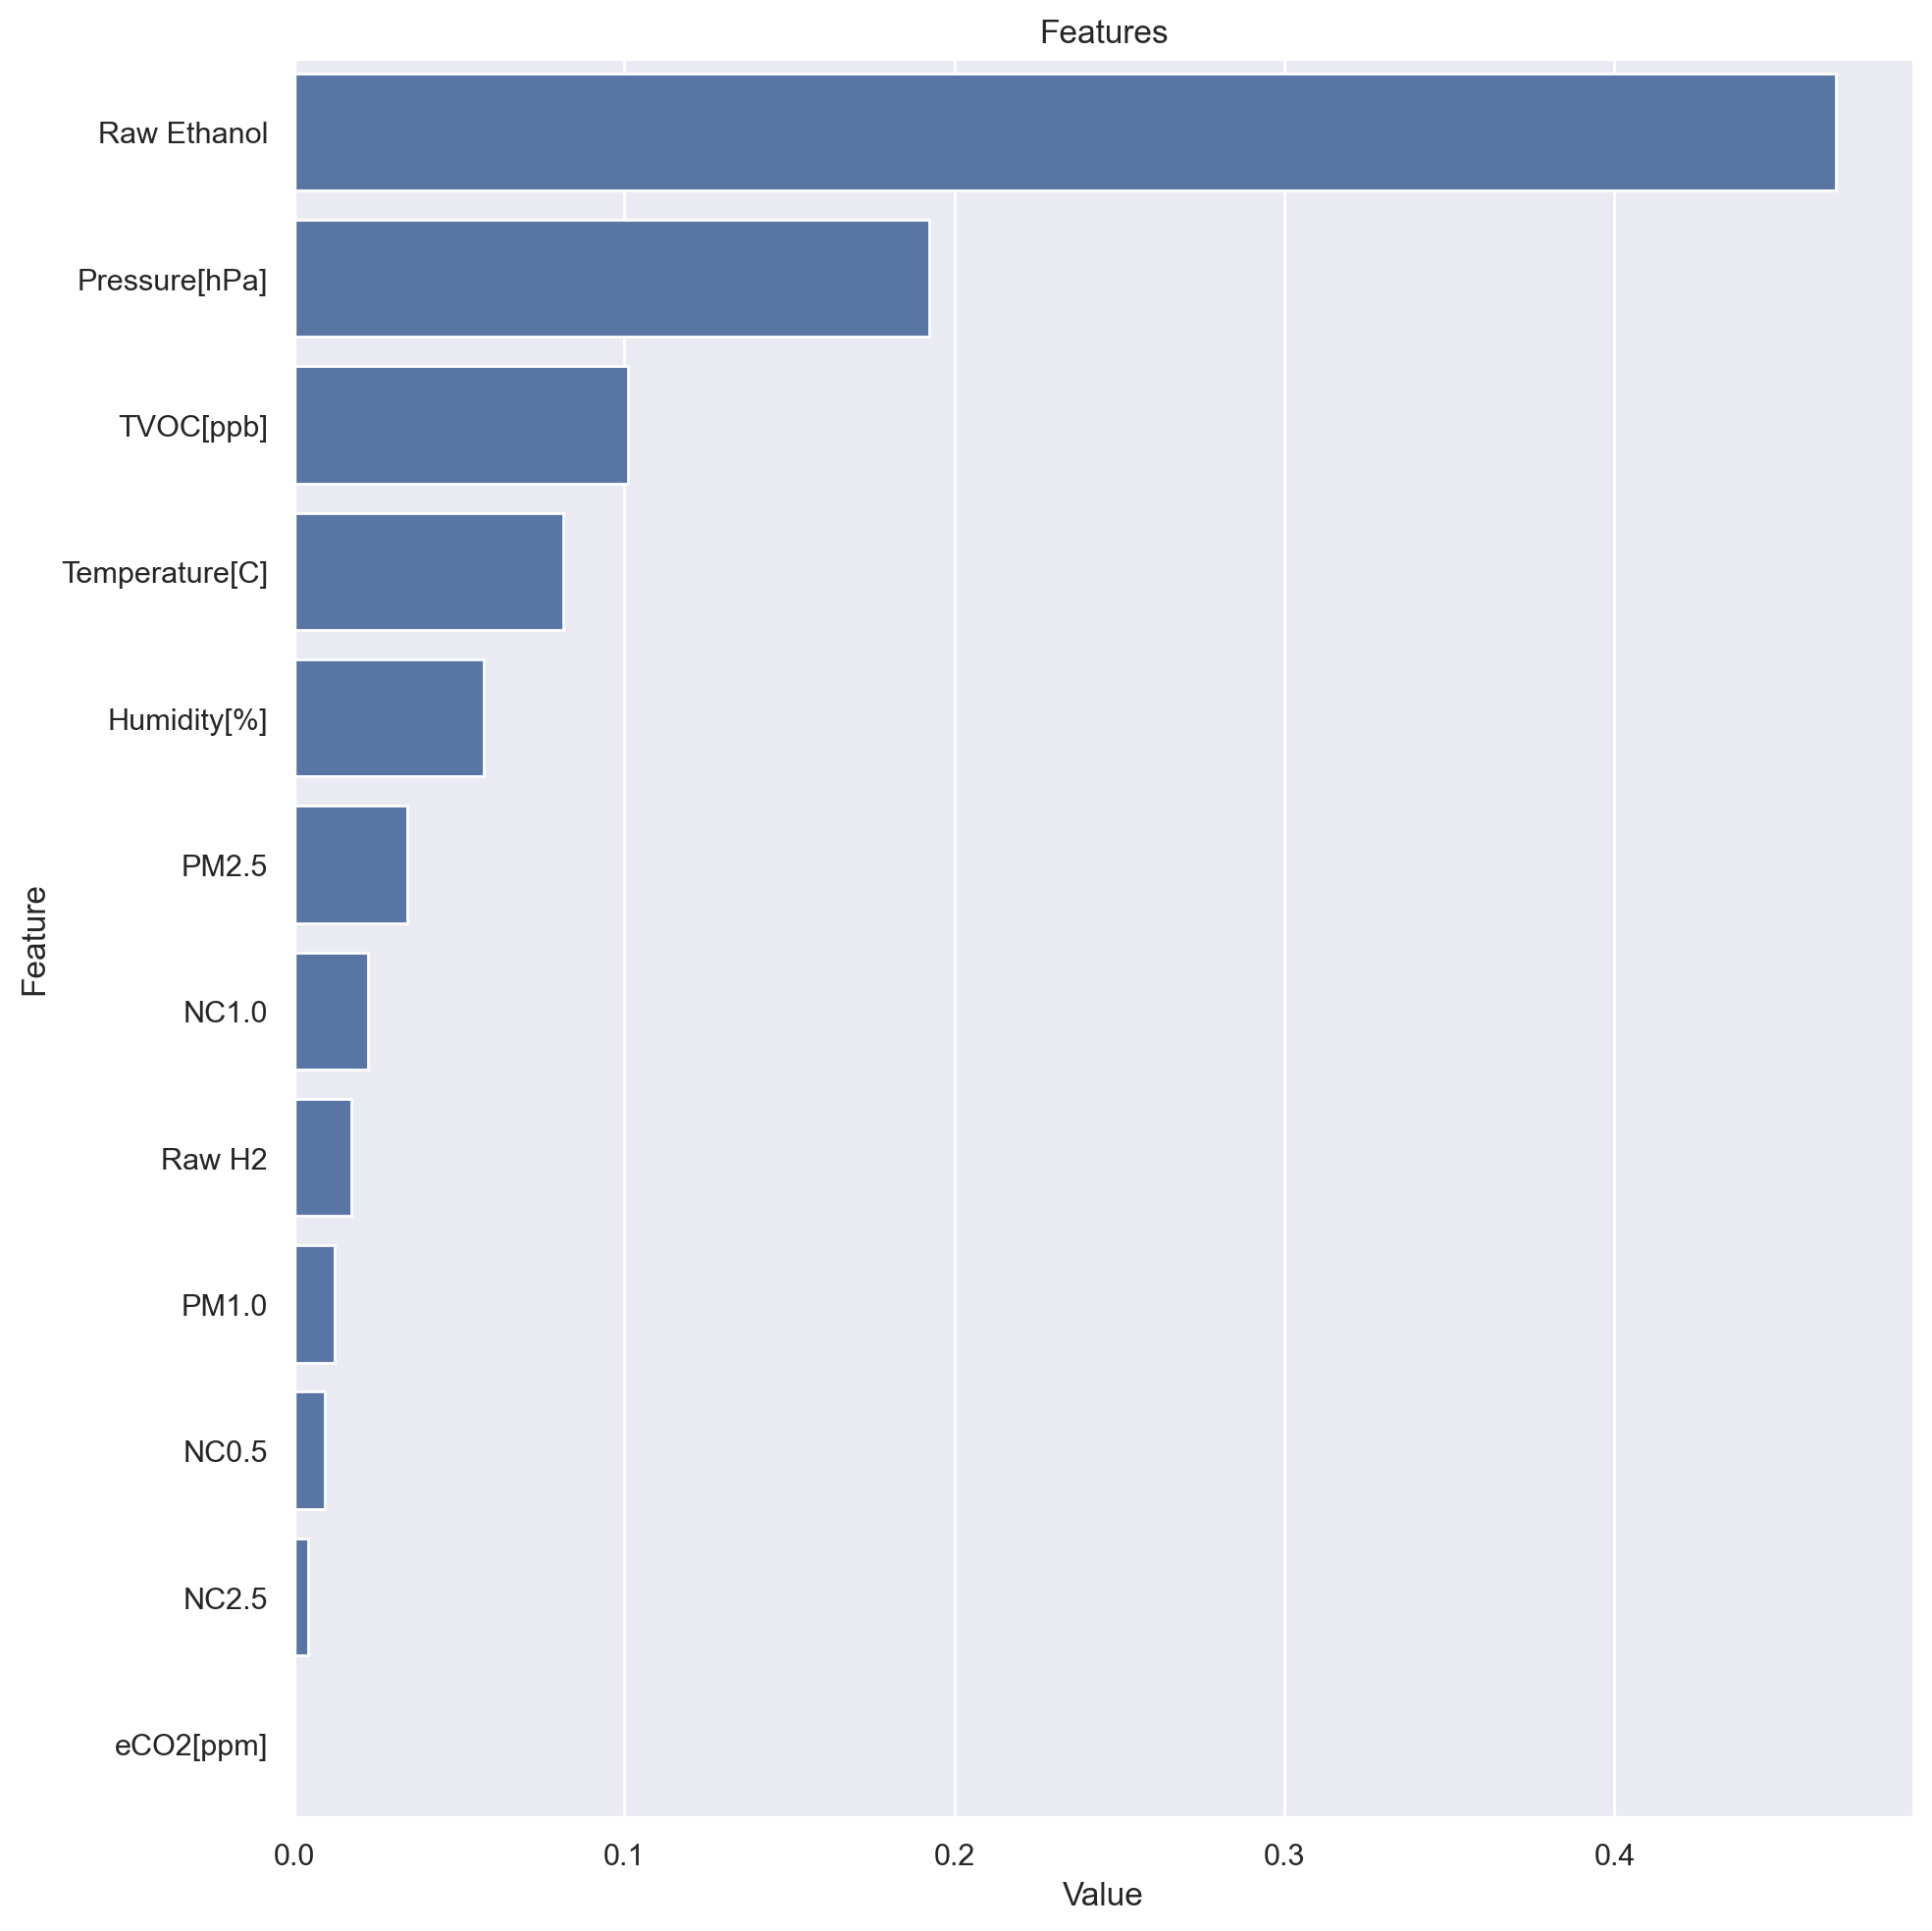

In [64]:
plot_importance(tc_model.fit(X_train,y_train), X)


## Handle Imbalance using SMOTE Over Sampling

In [65]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [66]:
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

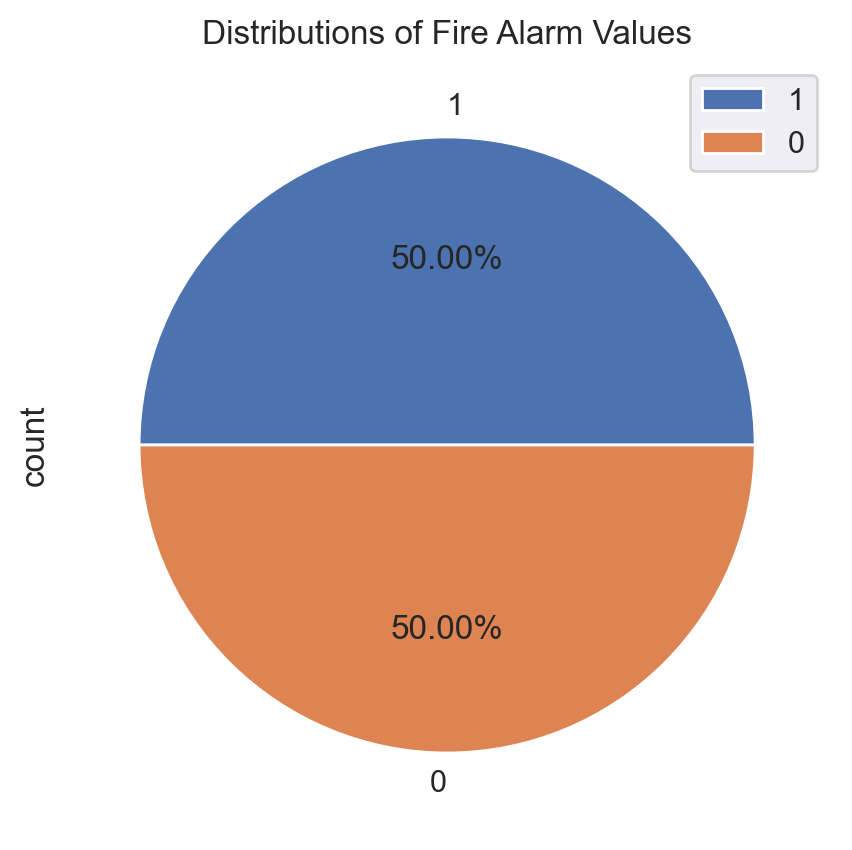

In [67]:
y_train_smote.value_counts().plot.pie( autopct = "%.2f%%")
plt.title("Distributions of Fire Alarm Values")
plt.legend()
plt.show()

In [68]:
Name_smote = []
Accuracy_smote = []
Precision_smote = []
Recall_smote = []
Time_Taken_smote = []
for model in models:
    Name_smote.append(type(model).__name__)
    begin = time.time()
    model.fit(x_train_smote,y_train_smote)
    prediction = model.predict(x_test)
    end = time.time()
    accuracyScore = accuracy_score(prediction,y_test)
    Accuracy_smote.append(accuracyScore)
    precisionScore = precision_score(prediction,y_test)
    Precision_smote.append(precisionScore)
    recallScore = recall_score(prediction,y_test)
    Recall_smote.append(recallScore)
    Time_Taken_smote.append(end-begin)

In [69]:
Dict = {'Name':Name_smote,'Accuracy':Accuracy_smote,'Recall':Recall_smote,'Precision':Precision_smote,'Time Taken':Time_Taken_smote}
model_df = pd.DataFrame(Dict)
model_df.sort_values(by='Accuracy', ascending=False)

Name  Accuracy    Recall  Precision  Time Taken
3       RandomForestClassifier  1.000000  1.000000   1.000000    7.966510
6            BaggingClassifier  0.999840  0.999888   0.999888    2.222409
0         KNeighborsClassifier  0.999601  0.999440   1.000000    0.994716
4   GradientBoostingClassifier  0.999601  0.999776   0.999664   20.206038
5           AdaBoostClassifier  0.999281  0.999440   0.999552    4.645469
10         ExtraTreeClassifier  0.999122  0.999216   0.999552    0.021000
2           LogisticRegression  0.891106  0.938595   0.906401    0.374264
1                SGDClassifier  0.873703  0.855193   0.990360    2.296929
7                          SVC  0.795944  0.988788   0.721668  149.567155
8                   GaussianNB  0.768322  0.763321   0.977917    0.018492
9              DummyClassifier  0.287801  0.000000   0.000000    0.002000

In [70]:
def cross_validate_models(models, X, y, cv=5):
    cv_results = []
    model_names = []
    for model in models:
        print(f"----> {model}")
        model_names.append(type(model).__name__)
        scores = cross_val_score(model, X, y, cv=cv)
        cv_results.append(scores.mean())
    
    df_results = pd.DataFrame({'Model': model_names, 'Mean CV Score': cv_results})
    return df_results


In [71]:
top_models = [RandomForestClassifier(),BaggingClassifier(), KNeighborsClassifier(),GradientBoostingClassifier(),ExtraTreeClassifier(),
         AdaBoostClassifier(),LogisticRegression(), SGDClassifier()]

In [72]:
cross_val_results_df = cross_validate_models(top_models, X, Y, cv=5)

----> RandomForestClassifier()
----> BaggingClassifier()
----> KNeighborsClassifier()
----> GradientBoostingClassifier()
----> ExtraTreeClassifier()
----> AdaBoostClassifier()
----> LogisticRegression()
----> SGDClassifier()


In [73]:
cross_val_results_df.sort_values('Mean CV Score', ascending=False)

Model  Mean CV Score
2        KNeighborsClassifier       0.979339
5          AdaBoostClassifier       0.942823
3  GradientBoostingClassifier       0.932732
0      RandomForestClassifier       0.918266
4         ExtraTreeClassifier       0.888855
1           BaggingClassifier       0.864330
7               SGDClassifier       0.833578
6          LogisticRegression       0.813684

## Dense Neural Network

In [78]:
import keras 
import tensorflow as tf

from keras.models import Sequential, load_model
from keras.layers import Dense

In [86]:
model = Sequential([
    Dense(32, activation='relu', kernel_initializer='he_normal', input_shape=(12,), name="Layer1"),
    Dense(64, activation='relu', kernel_initializer='he_normal', name="Layer2"),
    Dense(128, activation='relu', kernel_initializer='he_normal', name="Layer3"),
    Dense(1, activation='sigmoid', name="Output"),
], name="Classification-Model")

# Compile
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [87]:
X_train.shape

(50104, 12)

In [88]:
model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
)

Epoch 1/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 2s 903us/step - accuracy: 0.9450 - loss: 0.1460 - val_accuracy: 0.9910 - val_loss: 0.0260
Epoch 2/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 1s 803us/step - accuracy: 0.9903 - loss: 0.0278 - val_accuracy: 0.9935 - val_loss: 0.0204
Epoch 3/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 1s 817us/step - accuracy: 0.9933 - loss: 0.0184 - val_accuracy: 0.9935 - val_loss: 0.0179
Epoch 4/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 1s 815us/step - accuracy: 0.9948 - loss: 0.0162 - val_accuracy: 0.9949 - val_loss: 0.0137
Epoch 5/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 1s 821us/step - accuracy: 0.9959 - loss: 0.0121 - val_accuracy: 0.9962 - val_loss: 0.0130
Epoch 6/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 1s 829us/step - accuracy: 0.9961 - loss: 0.0115 - val_accuracy: 0.9975 - val_loss: 0.0108
Epoch 7/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 1s 828us/step - accuracy: 0.9969 - loss: 0.0163 - val_accuracy: 0.9964 - val_loss: 0.0079
Epoch 8/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 1s 814us/step - accuracy: 0.9976 -

In [89]:
model.evaluate(X_test, y_test)

392/392 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.9949 - loss: 0.0214


[0.02599966526031494, 0.9953696131706238]

## Evaluation

In [93]:
y_pred = np.round(model.predict(X_test))

392/392 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step


In [94]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

print(classification_report(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

[[3549   56]
 [   2 8919]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3605
           1       0.99      1.00      1.00      8921

    accuracy                           1.00     12526
   macro avg       1.00      0.99      0.99     12526
weighted avg       1.00      1.00      1.00     12526

AUC: 0.9921209146521298


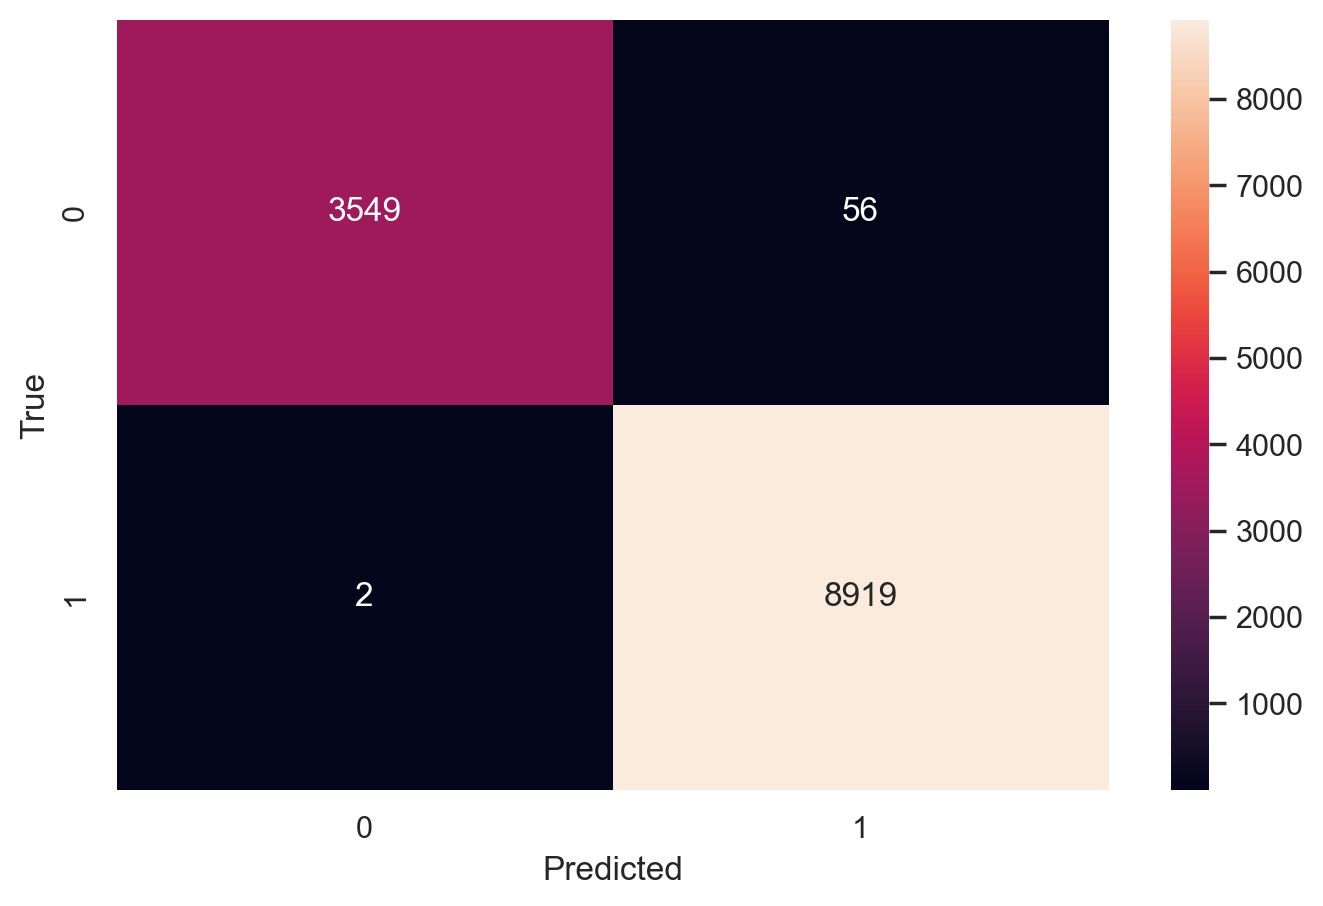

In [95]:
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()